In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/home/xhding/workspaces/torch-deep-retina')
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import h5py
from  torch.utils.data.dataset import Dataset
from torch.utils.data.dataloader import DataLoader
from scipy.stats import pearsonr
from fnn.evaluation import *
from fnn.utils import select_model
from fnn.config import get_custom_cfg
from fnn.data import TestDataset, ValidationDataset
from fnn.notebook.utils import *
from torchdeepretina.datas import loadexpt
import pyret

In [3]:
with h5py.File('/home/xhding/tem_stim/21-03-15/naturalscene.h5', 'r') as f:
    single_trial_bin = np.array(f['test']['repeats/binned'])
single_trial_bin = np.swapaxes(single_trial_bin,1,2)[:,40:6003,[0,1,2,3,4,6]]
Fano_bin(single_trial_bin)

0.8548212345629695

In [7]:
scale_factor = single_trial.mean(axis=1)/single_trial.mean(axis=(0,1))
norm_single_trial = single_trial / np.expand_dims(scale_factor, 1)
Fano(norm_single_trial)

0.0428414162658552

In [5]:
scale_factor = single_trial_bin.mean(axis=1)/single_trial_bin.mean(axis=(0,1))
norm_single_trial_bin = single_trial_bin / np.expand_dims(scale_factor, 1)
Fano_bin(norm_single_trial_bin)

0.8547394227957775

In [58]:
single_trial_bin.mean((1,2))

array([0.02465202, 0.02602158, 0.02669238, 0.02571413, 0.02683213,
       0.02426072, 0.02345016, 0.02065515, 0.0199005 , 0.0211862 ,
       0.0203477 , 0.01858684, 0.0197328 , 0.02185701, 0.01998435])

In [6]:
with h5py.File('/home/xhding/tem_stim/21-03-15/naturalscene.h5', 'r') as f:
    single_trial = np.array(f['test']['repeats/firing_rate_10ms'])
single_trial = np.swapaxes(single_trial,1,2)[:,40:6003,[0,1,2,3,4,6]]

In [4]:
single_trial.shape

(15, 5963, 6)

In [69]:
Fano(single_trial.astype(np.float64))

0.04363716401753369

In [39]:
single_trial.mean((1,2))

array([2.4652017 , 2.60215775, 2.66940138, 2.57074905, 2.68321315,
       2.42428053, 2.34486559, 2.06551513, 1.98920977, 2.11846947,
       2.03493326, 1.85672945, 1.97327966, 2.18502478, 1.99843479])

In [48]:
single_trial.astype(np.float32).dtype

dtype('float32')

In [106]:
fanos = np.var(0.01*norm_single_trial, axis=0)/(np.mean(0.01*norm_single_trial, axis=0)+1e-9)
nonzero_idxs = np.nonzero(fanos)
fanos[nonzero_idxs].mean()

0.04284141419703225

In [108]:
np.mean(np.var(0.01*norm_single_trial, axis=0)/(np.mean(0.01*norm_single_trial, axis=0)+1e-9))

0.04284141419703225

In [109]:
np.nanmean(np.var(norm_single_trial_bin[:15], axis=0)/(np.mean(norm_single_trial_bin[:15], axis=0)))

0.8547394227957775

In [104]:
fanos = np.var(norm_single_trial_bin, axis=0)/(np.mean(norm_single_trial_bin, axis=0)+1e-9)
nonzero_idxs = np.nonzero(fanos)
fanos[nonzero_idxs].mean()

0.8547394145793509

In [78]:
Fano(single_trial[0:4])

inf

In [24]:
corr = single_trial_corr_matrix(6, 15, single_trial)
stim_corr = stimuli_corr_matrix(6, 15, single_trial)
noise_corr = corr - stim_corr
stim_corr = np.delete(stim_corr.flatten(), diagonal_idxs)
noise_corr = np.delete(noise_corr.flatten(), diagonal_idxs)
print(stim_corr.mean(), noise_corr.mean())

0.23315338997720544 0.012355551426799779


In [11]:
diagonal_idxs = list(range(0, 6*6, 6+1))

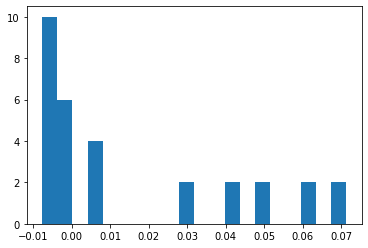

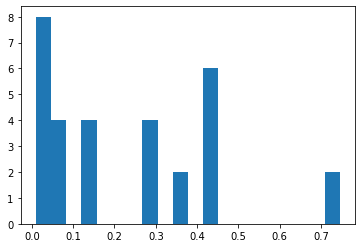

In [35]:
plt.hist(np.delete(noise_corr2(single_trial).flatten(), diagonal_idxs), bins=20)
plt.show()
plt.hist(np.delete(stim_corr2(single_trial).flatten(), diagonal_idxs), bins=20)
plt.show()

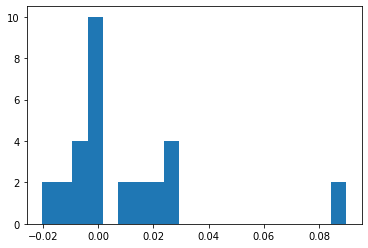

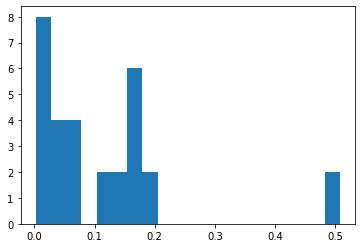

In [59]:
plt.hist(np.delete(noise_corr2(single_trial_bin).flatten(), diagonal_idxs), bins=20)
plt.show()
plt.hist(np.delete(stim_corr2(single_trial_bin).flatten(), diagonal_idxs), bins=20)
plt.show()

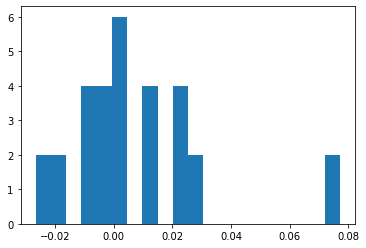

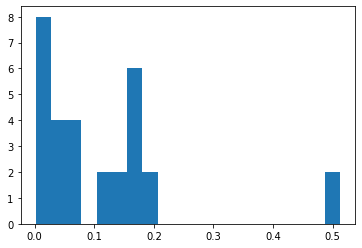

In [77]:
plt.hist(np.delete(noise_corr2(norm_single_trial_bin).flatten(), diagonal_idxs), bins=20)
plt.show()
plt.hist(np.delete(stim_corr2(norm_single_trial_bin).flatten(), diagonal_idxs), bins=20)
plt.show()

In [8]:
device = torch.device('cuda:1')
cfg = get_custom_cfg('bn_cnn_stack_try')
model = select_model(cfg, device)
checkpoint_path = '/home/xhding/saved_model/BN_CNN_Stack/epoch_045_loss_-3.42_pearson_0.6575.pth'
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

BN_CNN_Stack(
  (bipolar): Sequential(
    (0): LinearStackedConv2d(
      bias=True, abs_bnorm=False
      (convs): Sequential(
        (0): Conv2d(40, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (1): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (4): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (5): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (6): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
      )
    )
    (1): Flatten()
    (2): BatchNorm1d(10368, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
    (3): GaussianNoise(std=0.05, trainable=False, adapt=False, momentum=0.95)
    (4): ReLU()
  )
  (amacrine): Sequential(
    (0): Reshape(shape=(-1, 8, 36, 36))
    (1): LinearStackedConv2d(
      bias=True, abs_bnorm=False
      (convs): Seq

In [9]:
test_data = DataLoader(TestDataset(cfg), batch_size=10000)
test_pc, _, pred, targ = pearsonr_batch_eval(model, test_data, 6, device, cfg)
test_pc

0.852367171910896

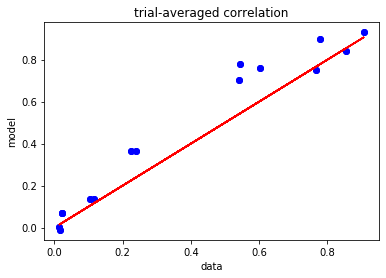

In [15]:
pred_single_trial = model_single_trial(model, test_data, device, n_repeats=1, n_cells=6, thre=14.)
pred_ave_corr = corr_matrix(6, pred_single_trial.mean(0))
ave_corr = corr_matrix(6, single_trial.mean(0))
ave_corr = np.delete(ave_corr.flatten(), diagonal_idxs)
pred_ave_corr = np.delete(pred_ave_corr.flatten(), diagonal_idxs)
plt.plot(ave_corr, pred_ave_corr, 'bo')
plt.plot(ave_corr, ave_corr, 'r-')
plt.xlabel('data')
plt.ylabel('model')
plt.title('trial-averaged correlation')
plt.show()

0.0 0.47180051958317326 0.83338418140597 3.8296515e-15 0.4530509568688264 -8.44232091642046e-18 0.9999999112183383
0.1 0.445840195830557 0.8333307600428839 0.03697225 0.43880654617381337 0.002574165594908201 0.8776903288209292
0.2 0.37795103081981346 0.8209237386252871 0.07579081 0.4015175413943811 0.010250302322938748 0.7800761122682464
0.3 0.27089795867085176 0.799805174751082 0.11407391 0.3436670698833422 0.021287872066201825 0.7984922907701678
0.4 0.1874955232034153 0.773125860994177 0.14346981 0.27549799848572565 0.035535703808396234 1.0646278263610822
0.5 0.17115365009995664 0.7414737367708467 0.16116613 0.20263738667359402 0.047249317919633306 1.4407296013725697
0.6 0.17091476473166134 0.7071606902113784 0.17287314 0.14536922218812842 0.05430941868913426 1.673849522366717
0.7 0.24044704730016528 0.6680613737606221 0.18512134 0.09649717851657276 0.06094132239637333 1.8167968894249513
0.8 0.275494209799148 0.6312360245542311 0.19537885 0.06862325556666171 0.06551201666157508 1.886

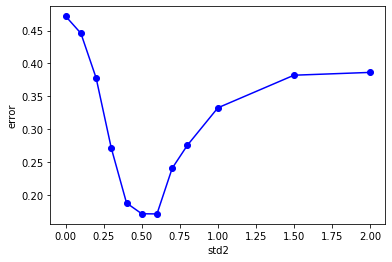

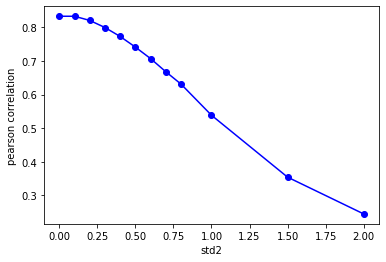

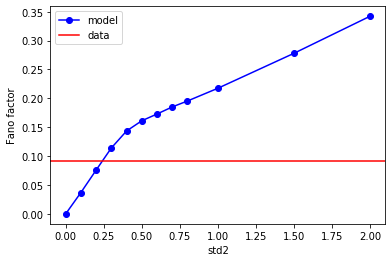

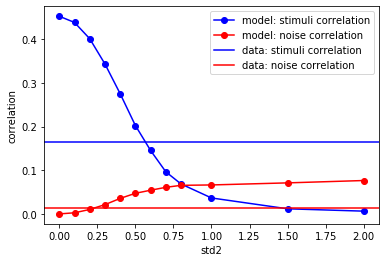

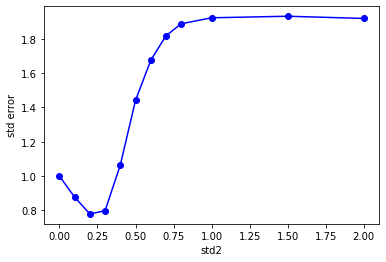

In [21]:
single_corr = single_trial_corr_matrix(6, 15, single_trial)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
std2_list = [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0, 1.5, 2.0]
error_list = []
accuracy_list = []
fano_list = []
mean_stim_corr_list = []
mean_noise_corr_list = []
std_error_list = []
for std2 in std2_list:
    error, accuracy, fano, mean_stim_corr, mean_noise_corr, std_error = Noises(model, test_data, single_corr, single_trial, device, n_repeats=15, n_cells=6, gaussian=[0, 0, std2, 0], thre=14.)
    print(std2, error, accuracy, fano, mean_stim_corr, mean_noise_corr, std_error)
    error_list.append(error)
    accuracy_list.append(accuracy)
    fano_list.append(fano)
    mean_stim_corr_list.append(mean_stim_corr)
    mean_noise_corr_list.append(mean_noise_corr)
    std_error_list.append(std_error)
single_noise_plot('std2', std2_list, error_list, accuracy_list, fano_list, mean_stim_corr_list, mean_noise_corr_list, std_error_list, 
                  recorded_fano=0.0436, recorded_mean_stim_corr=0.2332, recorded_mean_noise_corr=0.01236)

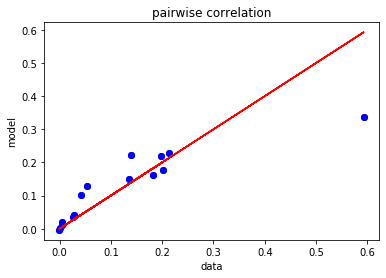

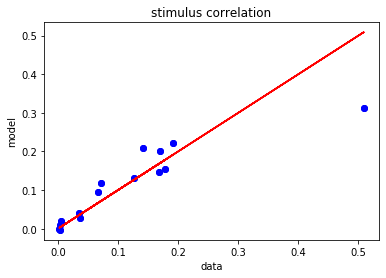

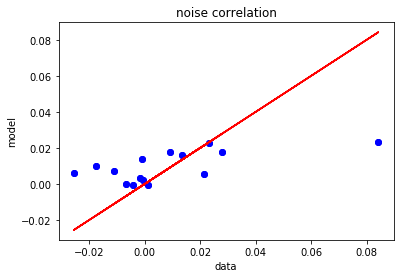

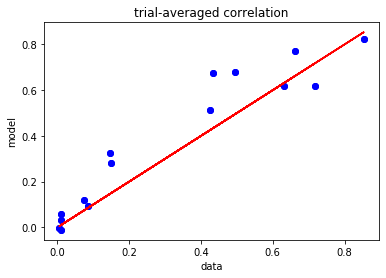

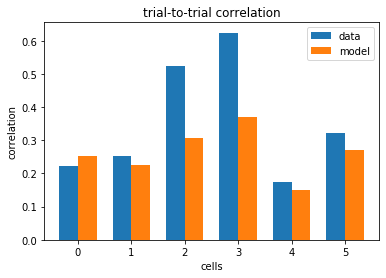

0.6691908


In [142]:
pred_single_trial = model_single_trial(model, test_data, device, n_repeats=15, n_cells=6, poisson=[None, None, 0.015], gaussian=[0.5, 0., 0.23, 0], thre=14)
correlation_plot(norm_single_trial_bin, pred_single_trial, 15, 6)
print(Fano(pred_single_trial))

In [146]:
Fano_bin((pred_single_trial/100.).round())

0.8065393

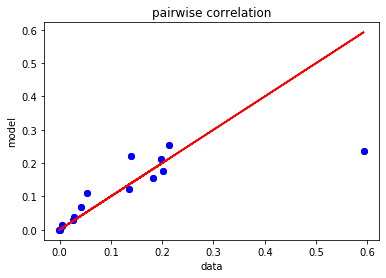

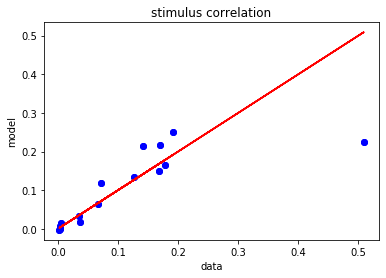

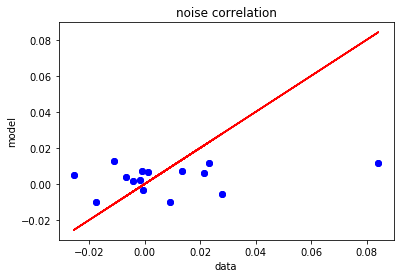

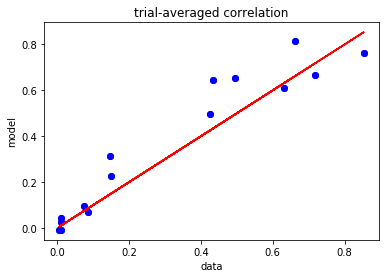

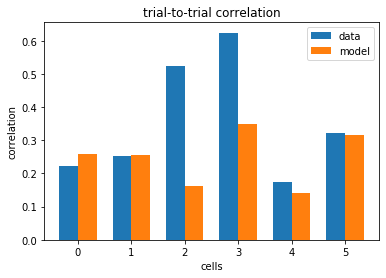

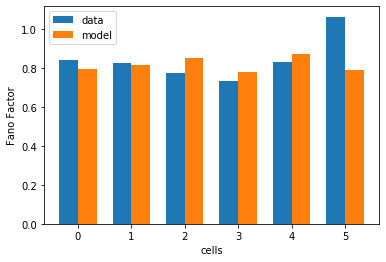

In [10]:
poisson_2s = [0.0135, 0.016, 0.04, 0.0405, 0.016, 0.0155]
pred_single_trial = model_single_trial(model, test_data, device, n_repeats=15, n_cells=6, poisson=[None, None, poisson_2s], gaussian=[0.5, 0., 0.23, 0], thre=15)
correlation_plot(norm_single_trial_bin, (pred_single_trial/100.).round(), 15, 6)

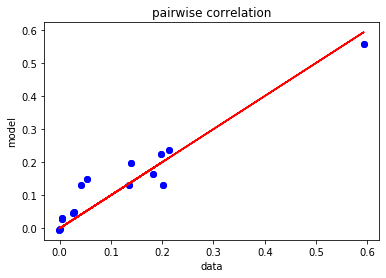

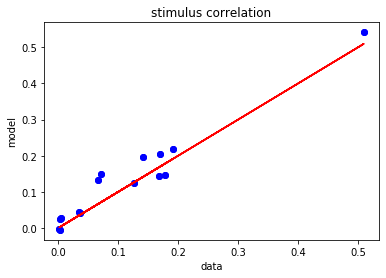

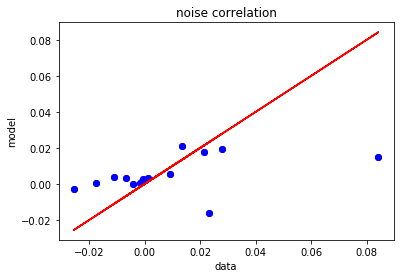

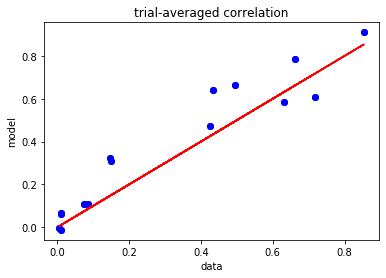

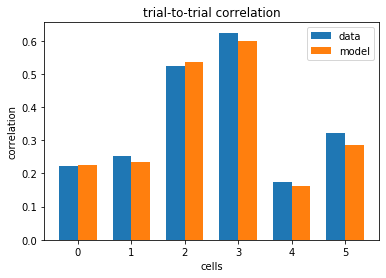

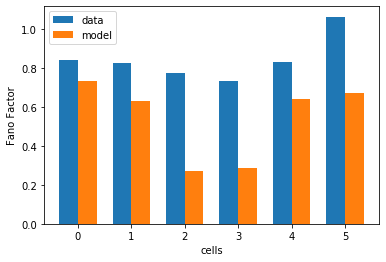

In [11]:
poisson_2s = [0.0135, 0.016, 0.04, 0.0405, 0.016, 0.0165]
pred_single_trial = model_single_trial(model, test_data, device, n_repeats=15, n_cells=6, poisson=[None, None, poisson_2s], gaussian=[0.5, 0., 0.23, 0], thre=15)
correlation_plot(norm_single_trial_bin, pred_single_trial/100., 15, 6)

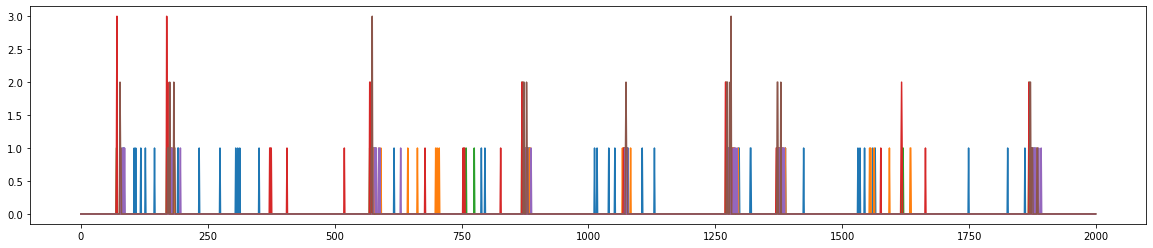

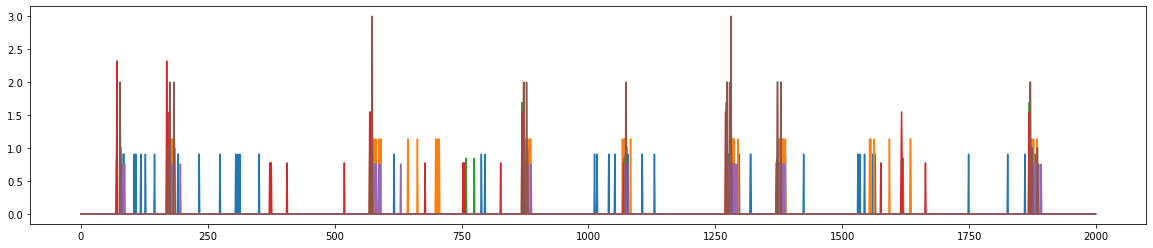

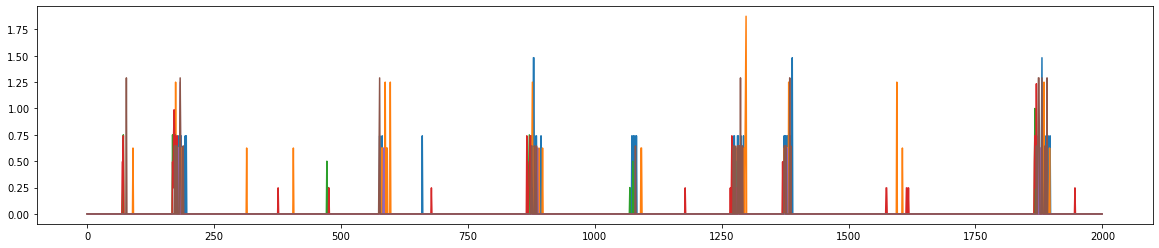

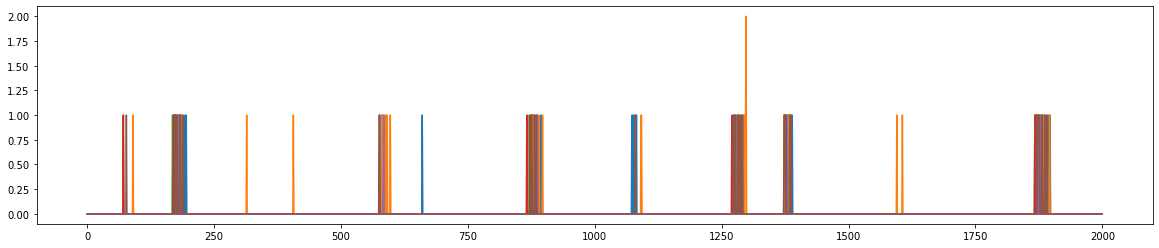

In [22]:
plt.figure(figsize=(20,4))
plt.plot(single_trial_bin[0,1000:3000,:])
plt.show()
plt.figure(figsize=(20,4))
plt.plot(norm_single_trial_bin[0,1000:3000,:])
plt.show()
plt.figure(figsize=(20,4))
plt.plot(pred_single_trial[0,1000:3000,:]/100.)
plt.show()
plt.figure(figsize=(20,4))
plt.plot((pred_single_trial[0,1000:3000,:]/100.).round())
plt.show()

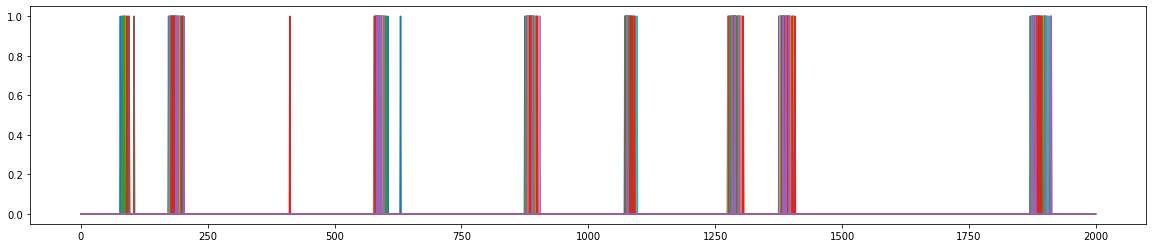

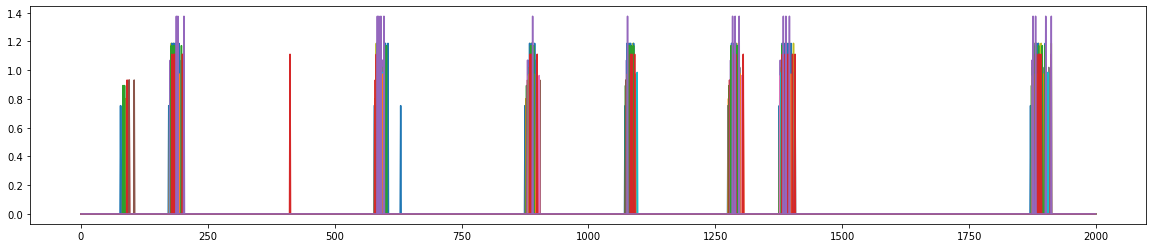

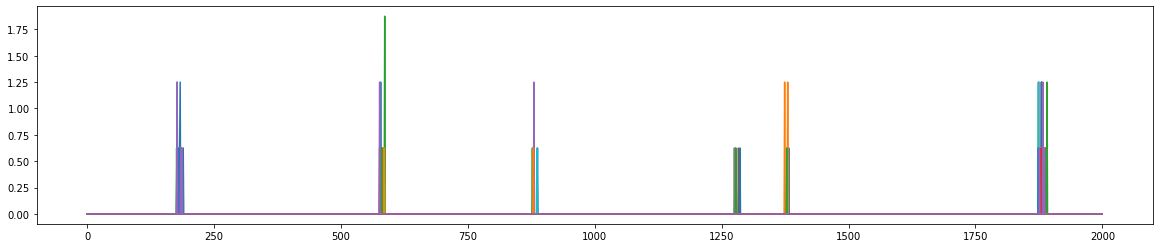

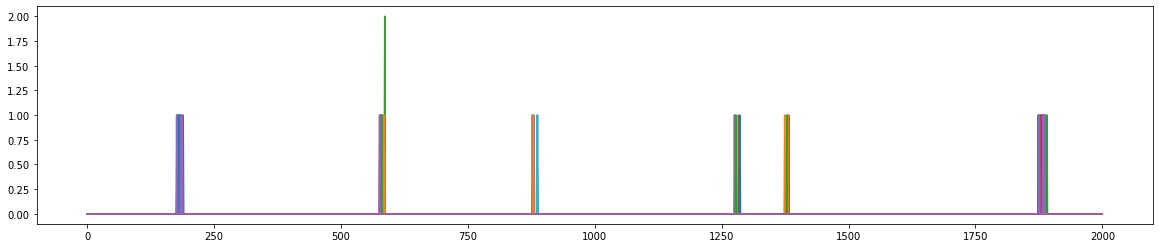

In [29]:
cell = 4
plt.figure(figsize=(20,4))
plt.plot(np.swapaxes(single_trial_bin[:,1000:3000,cell], 0, 1))
plt.show()
plt.figure(figsize=(20,4))
plt.plot(np.swapaxes(norm_single_trial_bin[:,1000:3000,cell], 0, 1))
plt.show()
plt.figure(figsize=(20,4))
plt.plot(np.swapaxes(pred_single_trial[:,1000:3000,cell]/100., 0, 1))
plt.show()
plt.figure(figsize=(20,4))
plt.plot(np.swapaxes((pred_single_trial[:,1000:3000,cell]/100.).round(), 0, 1))
plt.show()

In [35]:
poisson_2s = [0.0135, 0.016, 0.04, 0.0405, 0.016, 0.0165]
pred_single_trial1 = model_single_trial(model, test_data, device, n_repeats=15, n_cells=6, poisson=[None, None, poisson_2s], gaussian=[0.5, 0., 0.23, 0], thre=7)

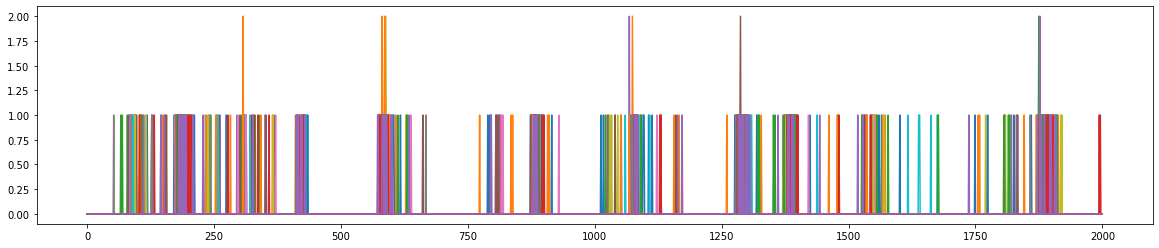

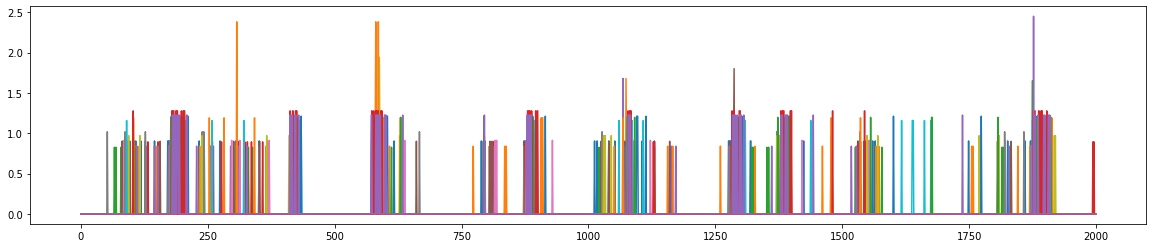

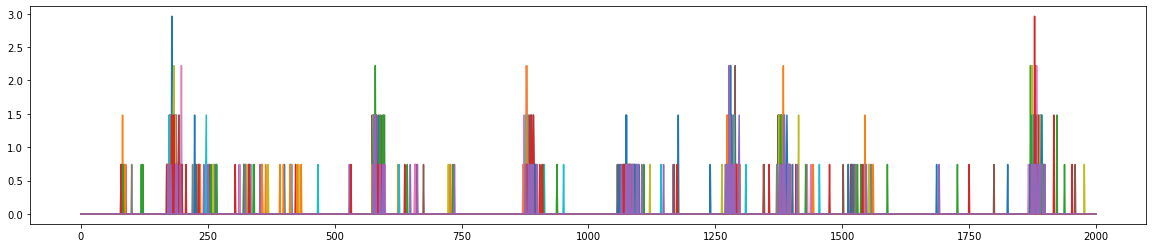

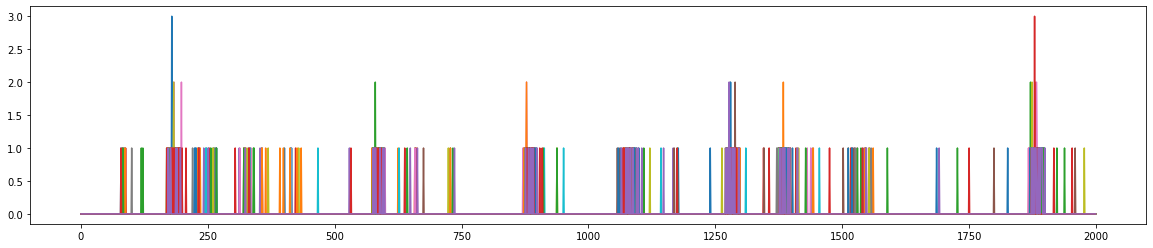

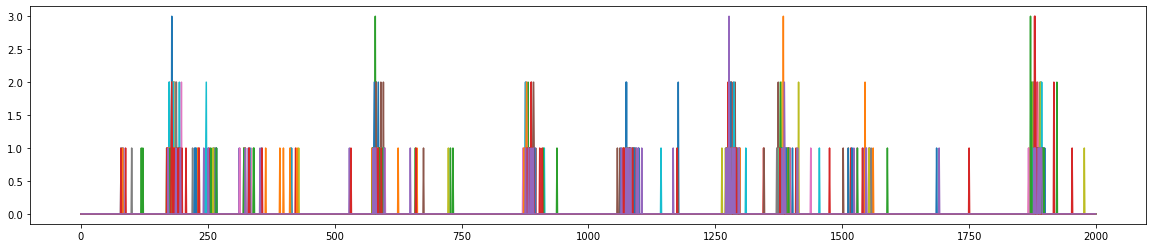

In [45]:
cell = 0
plt.figure(figsize=(20,4))
plt.plot(np.swapaxes(single_trial_bin[:,1000:3000,cell], 0, 1))
plt.show()
plt.figure(figsize=(20,4))
plt.plot(np.swapaxes(norm_single_trial_bin[:,1000:3000,cell], 0, 1))
plt.show()
plt.figure(figsize=(20,4))
plt.plot(np.swapaxes(pred_single_trial1[:,1000:3000,cell]/100., 0, 1))
plt.show()
plt.figure(figsize=(20,4))
plt.plot(np.swapaxes((pred_single_trial1[:,1000:3000,cell]/100.).round(), 0, 1))
plt.show()
plt.figure(figsize=(20,4))
pred_single_trial2 = np.floor(np.random.rand(*pred_single_trial1.shape) + pred_single_trial1/100.)
plt.plot(np.swapaxes((pred_single_trial2[:,1000:3000,cell]), 0, 1))
plt.show()

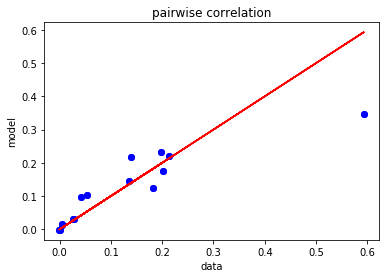

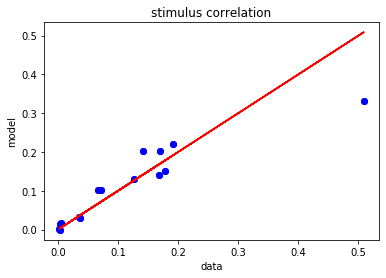

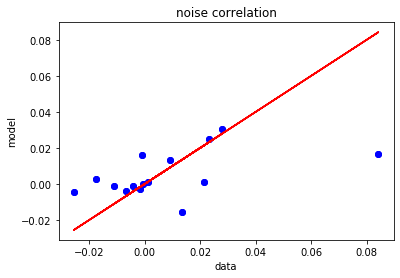

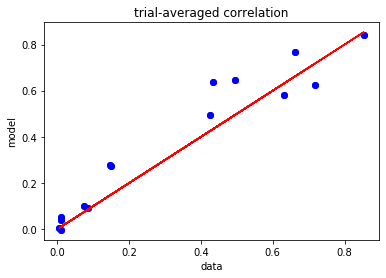

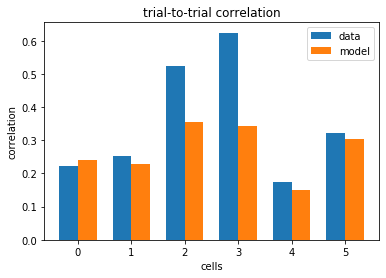

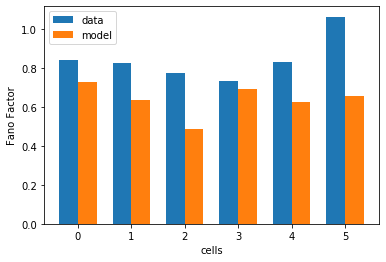

In [161]:
poisson_2s = [0.0135, 0.016, 0.04, 0.0405, 0.016, 0.0155]
pred_single_trial = model_single_trial(model, test_data, device, n_repeats=15, n_cells=6, poisson=[None, None, poisson_2s], gaussian=[0.5, 0., 0.23, 0], thre=15)
pred_single_trial = pred_single_trial/100.
pred_single_trial[pred_single_trial<0.5] = 0.
correlation_plot(norm_single_trial_bin, pred_single_trial, 15, 6)

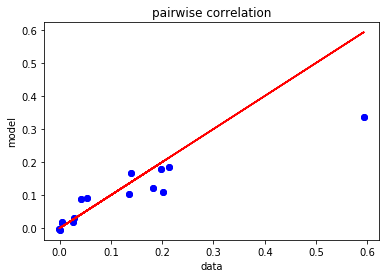

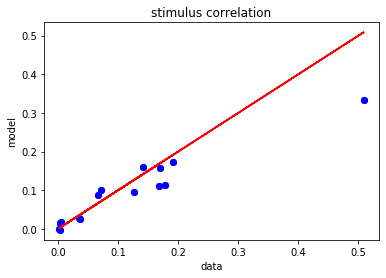

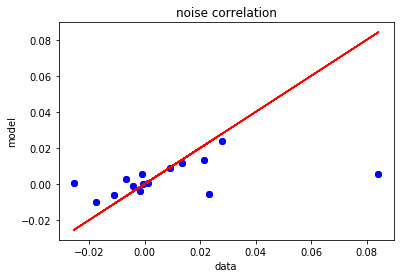

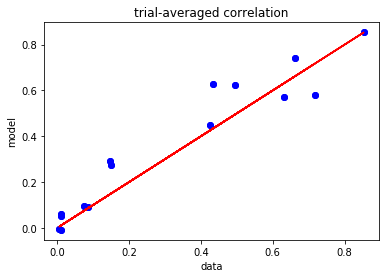

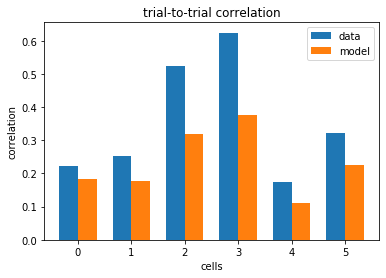

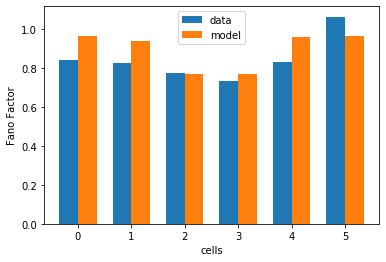

In [42]:
pred_single_trial2 = np.floor(np.random.rand(*pred_single_trial.shape) + pred_single_trial/100.)
correlation_plot(norm_single_trial_bin, pred_single_trial2, 15, 6)

In [46]:
poisson_2s = [0.0135, 0.016, 0.04, 0.0405, 0.016, 0.0155]
pred_single_trial = model_single_trial(model, test_data, device, n_repeats=15, n_cells=6, poisson=[None, None, poisson_2s], gaussian=[0.5, 0., 0.23, 0], thre=0)

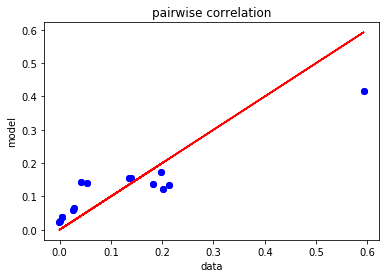

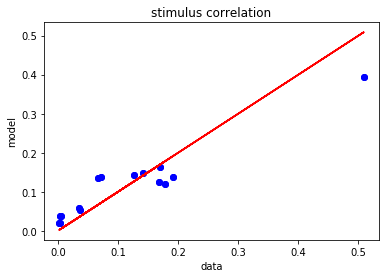

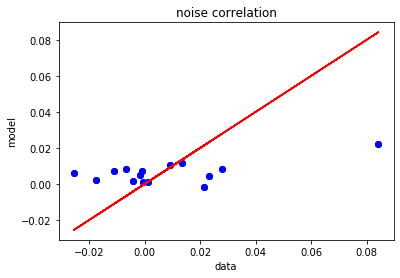

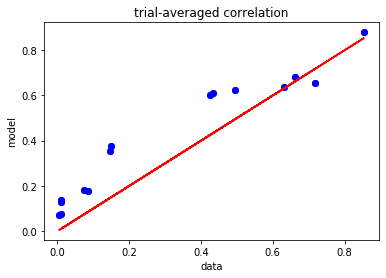

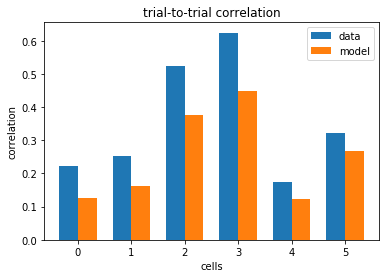

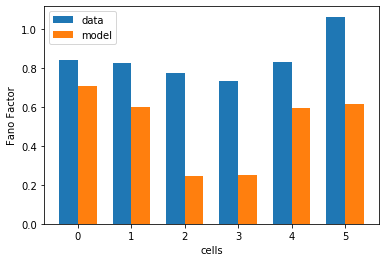

In [47]:
correlation_plot(norm_single_trial_bin, pred_single_trial/100., 15, 6)

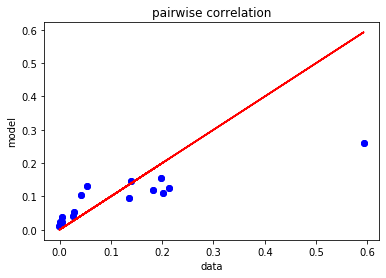

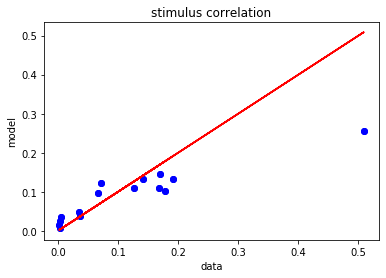

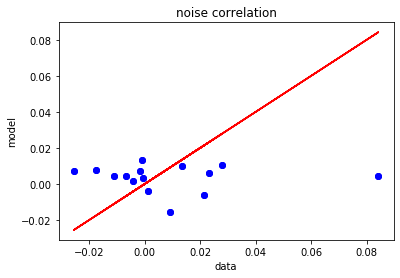

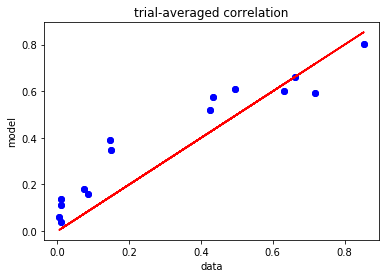

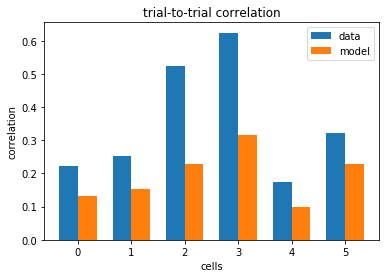

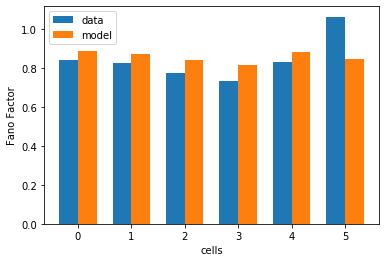

In [131]:
poisson_2s = [0.02, 0.022, 0.05, 0.049, 0.02, 0.02]
pred_single_trial = model_single_trial(model, test_data, device, n_repeats=15, n_cells=6, poisson=[None, None, poisson_2s], gaussian=[0.5, 0., 0.23, 0], thre=0)
pred_single_trial3 = pred_single_trial.copy()
pred_single_trial3[:, pred<1.5] = 0.
pred_single_trial3 = np.floor(np.random.rand(*pred_single_trial3.shape) + pred_single_trial3/100.)
correlation_plot(norm_single_trial_bin, pred_single_trial3, 15, 6)

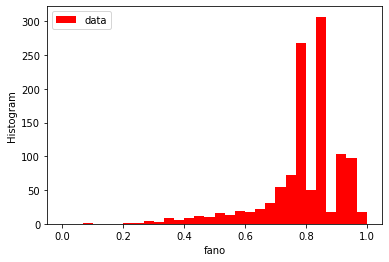

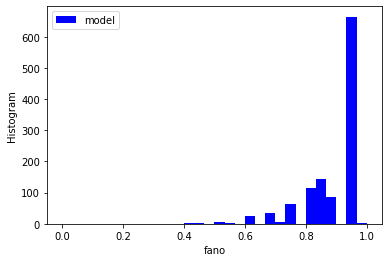

In [134]:
cell = 0
zero_idx = np.where(norm_single_trial_bin[:,:,cell].mean(0).flatten() == 0)[0]
plt.hist(np.delete(norm_single_trial_bin[:,:,cell].var(0).flatten(), zero_idx)/np.delete(norm_single_trial_bin[:,:,cell].mean(0).flatten(), zero_idx), bins=30, range=(0,1), color='r', label='data')
plt.xlabel('fano')
plt.ylabel('Histogram')
plt.legend()
plt.show()
zero_idx = np.where(pred_single_trial3[:,:,cell].mean(0).flatten() == 0)[0]
plt.hist(np.delete(pred_single_trial3[:,:,cell].var(0).flatten(), zero_idx)/np.delete(pred_single_trial3[:,:,cell].mean(0).flatten(), zero_idx), range=(0,1), bins=30, color='b', label='model')
plt.xlabel('fano')
plt.ylabel('Histogram')
plt.legend()
plt.show()

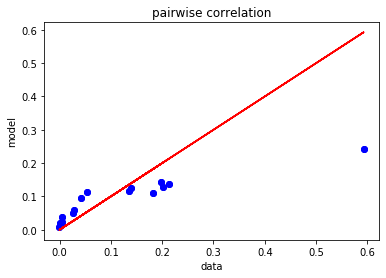

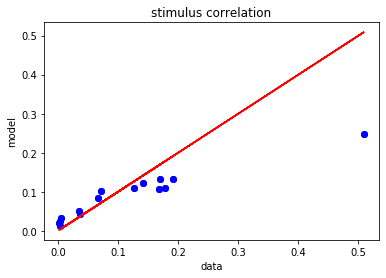

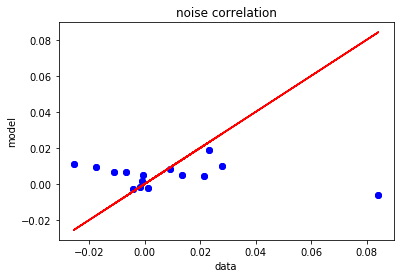

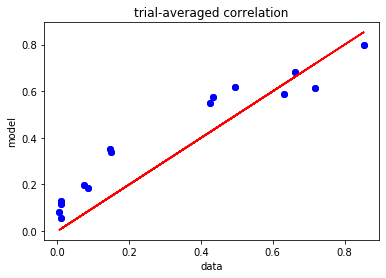

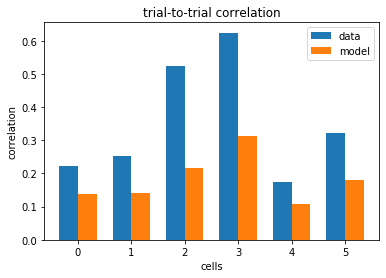

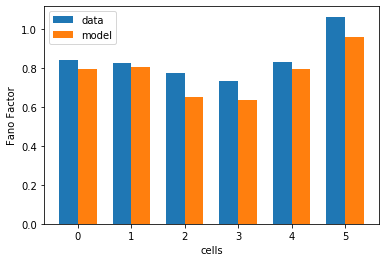

In [142]:
poisson_2s = [0.012, 0.012, 0.015, 0.015, 0.012, 0.01]
pred_single_trial = model_single_trial(model, test_data, device, n_repeats=15, n_cells=6, poisson=[None, None, poisson_2s], gaussian=[0.5, 0., 0.23, 0], thre=0)
pred_single_trial3 = pred_single_trial.copy()
pred_single_trial3[:, pred<1.5] = 0.
pred_single_trial3 = pred_single_trial3/100.
#pred_single_trial3 = np.floor(np.random.rand(*pred_single_trial3.shape) + pred_single_trial3/100.)
correlation_plot(norm_single_trial_bin, pred_single_trial3, 15, 6)

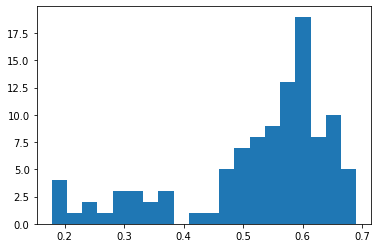

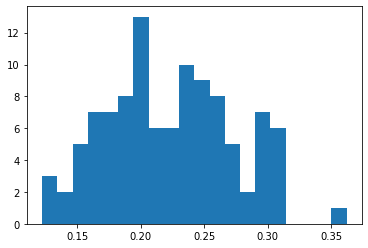

In [110]:
cell = 2
corrs = []
for i in range(15):
    for j in range(i+1, 15):
        corrs.append(pearsonr(norm_single_trial_bin[i,:,cell], norm_single_trial_bin[j,:,cell])[0])
plt.hist(corrs, bins=20)
plt.show()
corrs = []
for i in range(15):
    for j in range(i+1, 15):
        corrs.append(pearsonr(pred_single_trial3[i,:,cell], pred_single_trial3[j,:,cell])[0])
plt.hist(corrs, bins=20)
plt.show()

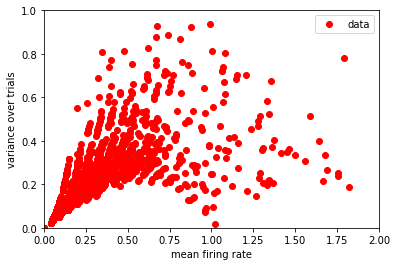

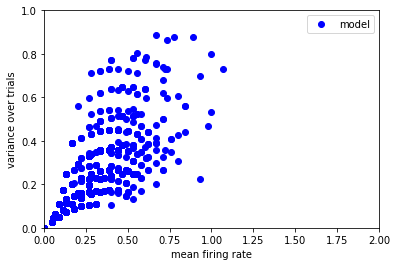

In [119]:
plt.plot(norm_single_trial_bin.mean(0).flatten(), norm_single_trial_bin.var(0).flatten(), 'ro', label='data')
plt.ylim(0, 1)
plt.xlim(0, 2)
plt.xlabel('mean firing rate')
plt.ylabel('variance over trials')
plt.legend()
plt.show()
plt.plot((pred_single_trial3/100.).mean(0).flatten(), (pred_single_trial3/100.).var(0).flatten(), 'bo', label='model')
plt.ylim(0, 1)
plt.xlim(0, 2)
plt.xlabel('mean firing rate')
plt.ylabel('variance over trials')
plt.legend()
plt.show()

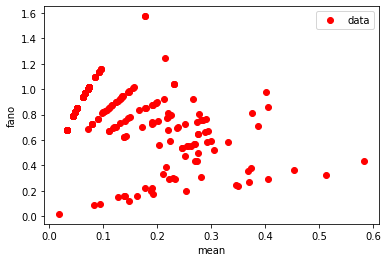

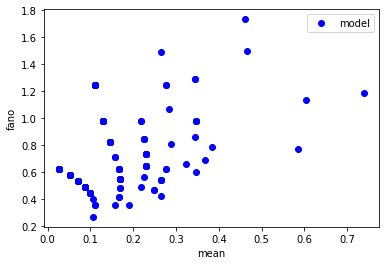

In [146]:
cell = 2
zero_idx = np.where(norm_single_trial_bin[:,:,cell].mean(0).flatten() == 0)[0]
fanos = np.delete(norm_single_trial_bin[:,:,cell].var(0).flatten(), zero_idx)/np.delete(norm_single_trial_bin[:,:,cell].mean(0).flatten(), zero_idx)
plt.plot(np.delete(norm_single_trial_bin[:,:,cell].var(0).flatten(), zero_idx), fanos, 'ro', label='data')
plt.xlabel('mean')
plt.ylabel('fano')
plt.legend()
plt.show()
zero_idx = np.where(pred_single_trial3[:,:,cell].mean(0).flatten() == 0)[0]
fanos = np.delete(pred_single_trial3[:,:,cell].var(0).flatten(), zero_idx)/np.delete(pred_single_trial3[:,:,cell].mean(0).flatten(), zero_idx)
plt.plot(np.delete(pred_single_trial3[:,:,cell].var(0).flatten(), zero_idx), fanos, 'bo', label='model')
plt.xlabel('mean')
plt.ylabel('fano')
plt.legend()
plt.show()

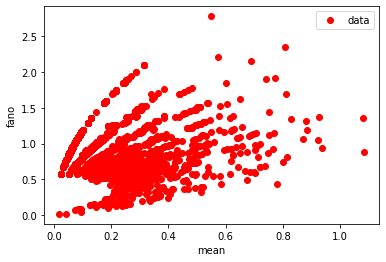

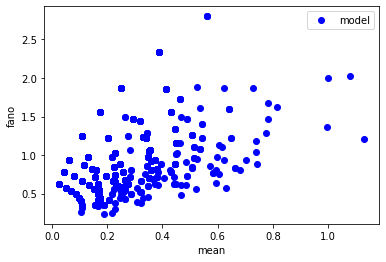

In [144]:
zero_idx = np.where(norm_single_trial_bin.mean(0).flatten() == 0)[0]
fanos = np.delete(norm_single_trial_bin.var(0).flatten(), zero_idx)/np.delete(norm_single_trial_bin.mean(0).flatten(), zero_idx)
plt.plot(np.delete(norm_single_trial_bin.var(0).flatten(), zero_idx), fanos, 'ro', label='data')
plt.xlabel('mean')
plt.ylabel('fano')
plt.legend()
plt.show()
zero_idx = np.where(pred_single_trial3.mean(0).flatten() == 0)[0]
fanos = np.delete(pred_single_trial3.var(0).flatten(), zero_idx)/np.delete(pred_single_trial3.mean(0).flatten(), zero_idx)
plt.plot(np.delete(pred_single_trial3.var(0).flatten(), zero_idx), fanos, 'bo', label='model')
plt.xlabel('mean')
plt.ylabel('fano')
plt.legend()
plt.show()

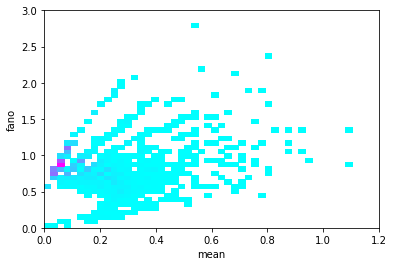

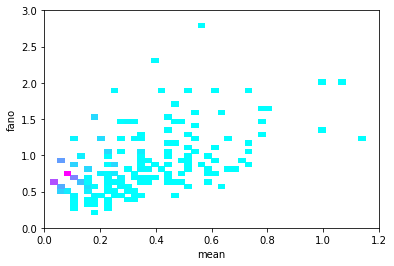

In [173]:
zero_idx = np.where(norm_single_trial_bin.mean(0).flatten() == 0)[0]
fanos = np.delete(norm_single_trial_bin.var(0).flatten(), zero_idx)/np.delete(norm_single_trial_bin.mean(0).flatten(), zero_idx)
plt.hist2d(np.delete(norm_single_trial_bin.var(0).flatten(), zero_idx), fanos, bins=50, cmax=500, cmin=1, range=((0,1.2),(0,3)), cmap='cool')
plt.xlabel('mean')
plt.ylabel('fano')
plt.show()
zero_idx = np.where(pred_single_trial3.mean(0).flatten() == 0)[0]
fanos = np.delete(pred_single_trial3.var(0).flatten(), zero_idx)/np.delete(pred_single_trial3.mean(0).flatten(), zero_idx)
plt.hist2d(np.delete(pred_single_trial3.var(0).flatten(), zero_idx), fanos, bins=50, cmax=500, cmin=1, range=((0,1.2),(0,3)), cmap='cool')
plt.xlabel('mean')
plt.ylabel('fano')
plt.show()

In [118]:
(norm_single_trial_bin.mean(0)==0).mean(), (pred_single_trial3.mean(0)==0).mean()

(0.8945161831292974, 0.8816870702666443)

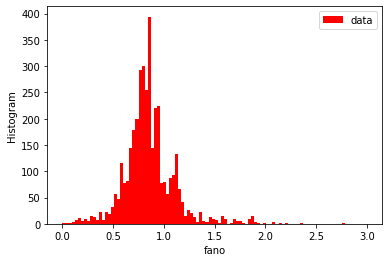

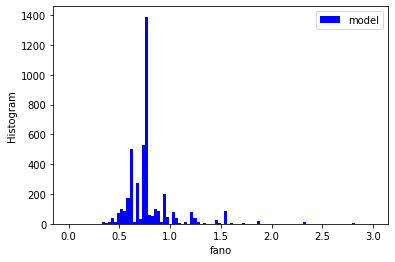

In [169]:
zero_idx = np.where(norm_single_trial_bin.mean(0).flatten() == 0)[0]
plt.hist(np.delete(norm_single_trial_bin.var(0).flatten(), zero_idx)/np.delete(norm_single_trial_bin.mean(0).flatten(), zero_idx), bins=100, range=(0,3), color='r', label='data')
plt.xlabel('fano')
plt.ylabel('Histogram')
plt.legend()
plt.show()
zero_idx = np.where(pred_single_trial3.mean(0).flatten() == 0)[0]
plt.hist(np.delete(pred_single_trial3.var(0).flatten(), zero_idx)/np.delete(pred_single_trial3.mean(0).flatten(), zero_idx), range=(0,3), bins=100, color='b', label='model')
plt.xlabel('fano')
plt.ylabel('Histogram')
plt.legend()
plt.show()

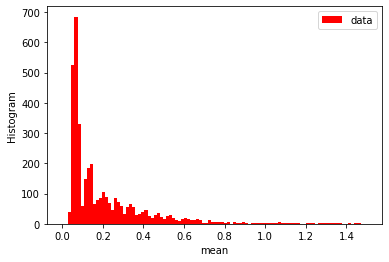

0.21480303833245012


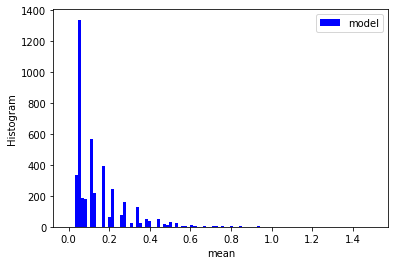

0.14429222


In [176]:
zero_idx = np.where(norm_single_trial_bin.mean(0).flatten() == 0)[0]
plt.hist(np.delete(norm_single_trial_bin.mean(0).flatten(), zero_idx), bins=100, range=(0,1.5), color='r', label='data')
plt.xlabel('mean')
plt.ylabel('Histogram')
plt.legend()
plt.show()
print(np.delete(norm_single_trial_bin.mean(0).flatten(), zero_idx).mean())
zero_idx = np.where(pred_single_trial3.mean(0).flatten() == 0)[0]
plt.hist(np.delete(pred_single_trial3.mean(0).flatten(), zero_idx), range=(0,1.5), bins=100, color='b', label='model')
plt.xlabel('mean')
plt.ylabel('Histogram')
plt.legend()
plt.show()
print(np.delete(pred_single_trial3.mean(0).flatten(), zero_idx).mean())

In [177]:
targ.mean(), pred.mean()

(2.265431030285194, 2.5031552)

In [180]:
zero_idx = np.where(norm_single_trial_bin.mean(0).flatten() == 0)[0]
np.delete(targ.flatten(), zero_idx).mean(), np.delete(pred.flatten(), zero_idx).mean()

(18.96987204857986, 14.955599)

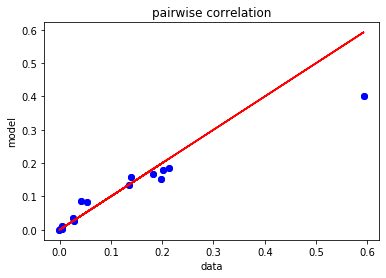

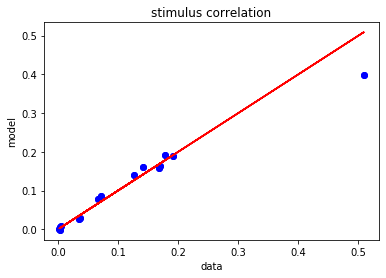

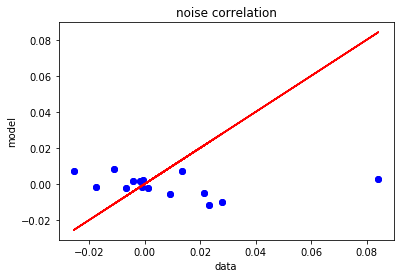

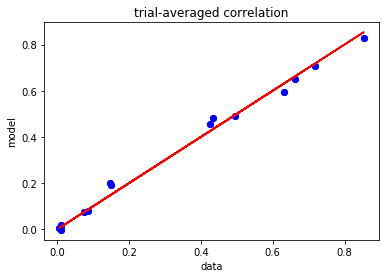

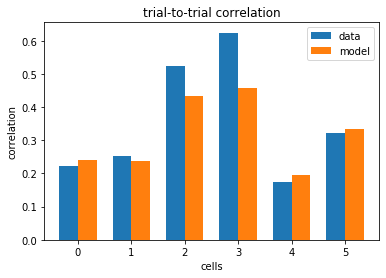

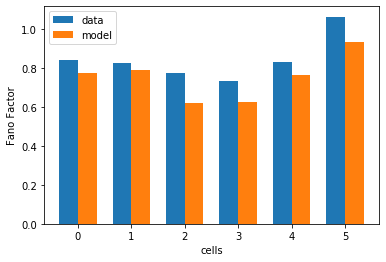

In [189]:
device = torch.device('cuda:0')
single_trial_pre = np.repeat(np.expand_dims(targ, axis=0), 15, axis=0)
single_trial_pre = torch.from_numpy(single_trial_pre).to(device)
poisson_2s = [0.012, 0.012, 0.015, 0.015, 0.012, 0.01]
pred_single_trial = model_single_trial_post(single_trial_pre, poisson_2s, 0)
pred_single_trial3 = pred_single_trial.copy()
pred_single_trial3[:, pred<1.5] = 0.
pred_single_trial3 = pred_single_trial3/100.
correlation_plot(norm_single_trial_bin, pred_single_trial3, 15, 6)

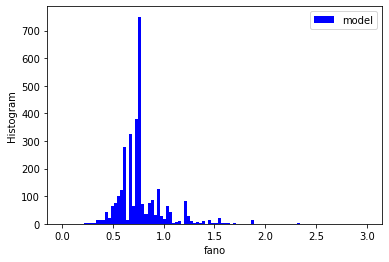

In [190]:
zero_idx = np.where(pred_single_trial3.mean(0).flatten() == 0)[0]
plt.hist(np.delete(pred_single_trial3.var(0).flatten(), zero_idx)/np.delete(pred_single_trial3.mean(0).flatten(), zero_idx), range=(0,3), bins=100, color='b', label='model')
plt.xlabel('fano')
plt.ylabel('Histogram')
plt.legend()
plt.show()

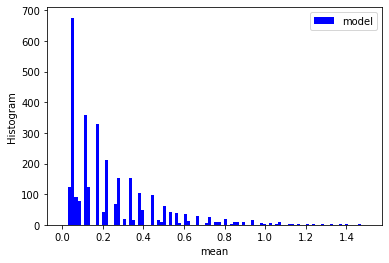

0.23572759959698975


In [191]:
zero_idx = np.where(pred_single_trial3.mean(0).flatten() == 0)[0]
plt.hist(np.delete(pred_single_trial3.mean(0).flatten(), zero_idx), range=(0,1.5), bins=100, color='b', label='model')
plt.xlabel('mean')
plt.ylabel('Histogram')
plt.legend()
plt.show()
print(np.delete(pred_single_trial3.mean(0).flatten(), zero_idx).mean())

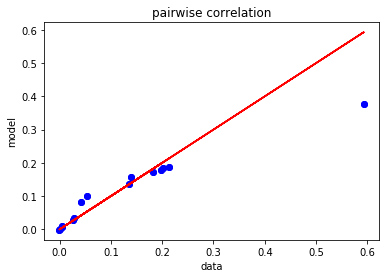

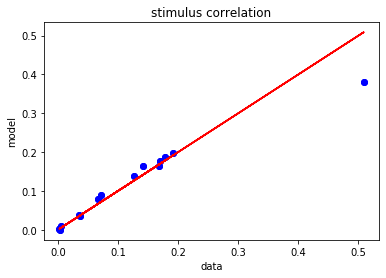

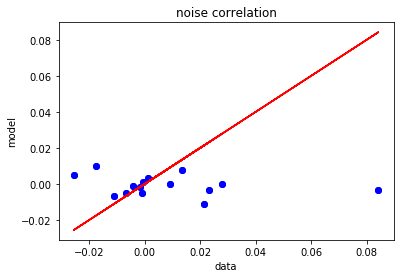

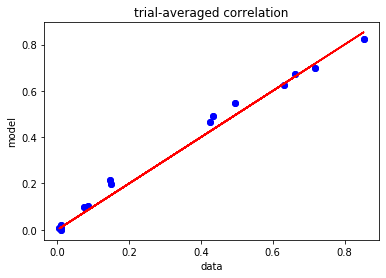

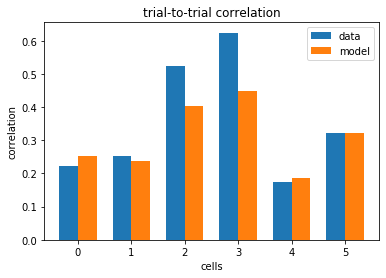

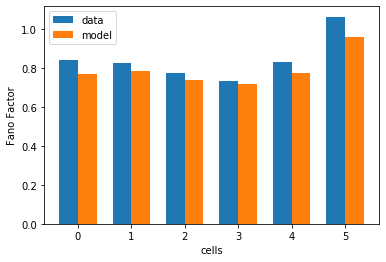

In [207]:
device = torch.device('cuda:0')
single_trial_pre = np.repeat(np.expand_dims(targ, axis=0), 15, axis=0)
single_trial_pre = torch.from_numpy(single_trial_pre).to(device)
poisson_2s = [0.012, 0.012, 0.013, 0.013, 0.012, 0.01]
poisson_rates = (torch.rand(*single_trial_pre.shape).to(device) * 0.1) - 0.05
poisson_rates += 0.01/torch.tensor(poisson_2s).to(device)
poisson_rates = 0.01/poisson_rates
pred_single_trial = torch.poisson(single_trial_pre * poisson_rates) / poisson_rates
pred_single_trial = pred_single_trial.cpu().numpy()
pred_single_trial3 = pred_single_trial.copy()
pred_single_trial3[:, pred<1.5] = 0.
pred_single_trial3 = pred_single_trial3/100.
correlation_plot(norm_single_trial_bin, pred_single_trial3, 15, 6)

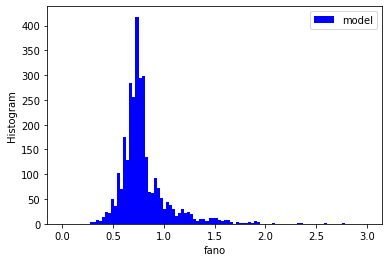

In [208]:
zero_idx = np.where(pred_single_trial3.mean(0).flatten() == 0)[0]
plt.hist(np.delete(pred_single_trial3.var(0).flatten(), zero_idx)/np.delete(pred_single_trial3.mean(0).flatten(), zero_idx), range=(0,3), bins=100, color='b', label='model')
plt.xlabel('fano')
plt.ylabel('Histogram')
plt.legend()
plt.show()

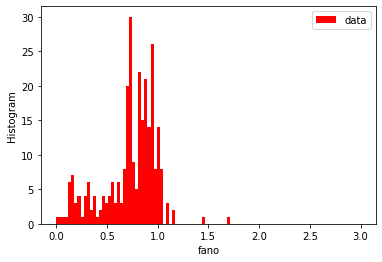

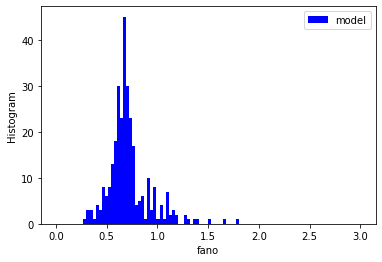

In [221]:
cell = 3
zero_idx = np.where(norm_single_trial_bin[:,:,cell].mean(0).flatten() == 0)[0]
plt.hist(np.delete(norm_single_trial_bin[:,:,cell].var(0).flatten(), zero_idx)/np.delete(norm_single_trial_bin[:,:,cell].mean(0).flatten(), zero_idx), bins=100, range=(0,3), color='r', label='data')
plt.xlabel('fano')
plt.ylabel('Histogram')
plt.legend()
plt.show()
zero_idx = np.where(pred_single_trial3[:,:,cell].mean(0).flatten() == 0)[0]
plt.hist(np.delete(pred_single_trial3[:,:,cell].var(0).flatten(), zero_idx)/np.delete(pred_single_trial3[:,:,cell].mean(0).flatten(), zero_idx), range=(0,3), bins=100, color='b', label='model')
plt.xlabel('fano')
plt.ylabel('Histogram')
plt.legend()
plt.show()

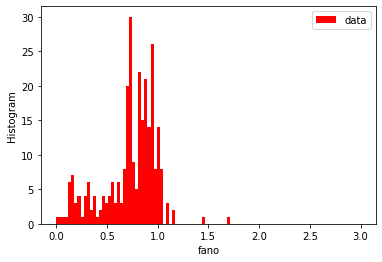

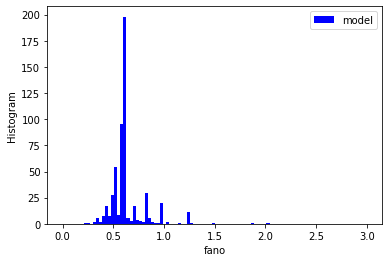

In [150]:
cell = 3
zero_idx = np.where(norm_single_trial_bin[:,:,cell].mean(0).flatten() == 0)[0]
plt.hist(np.delete(norm_single_trial_bin[:,:,cell].var(0).flatten(), zero_idx)/np.delete(norm_single_trial_bin[:,:,cell].mean(0).flatten(), zero_idx), bins=100, range=(0,3), color='r', label='data')
plt.xlabel('fano')
plt.ylabel('Histogram')
plt.legend()
plt.show()
zero_idx = np.where(pred_single_trial3[:,:,cell].mean(0).flatten() == 0)[0]
plt.hist(np.delete(pred_single_trial3[:,:,cell].var(0).flatten(), zero_idx)/np.delete(pred_single_trial3[:,:,cell].mean(0).flatten(), zero_idx), range=(0,3), bins=100, color='b', label='model')
plt.xlabel('fano')
plt.ylabel('Histogram')
plt.legend()
plt.show()

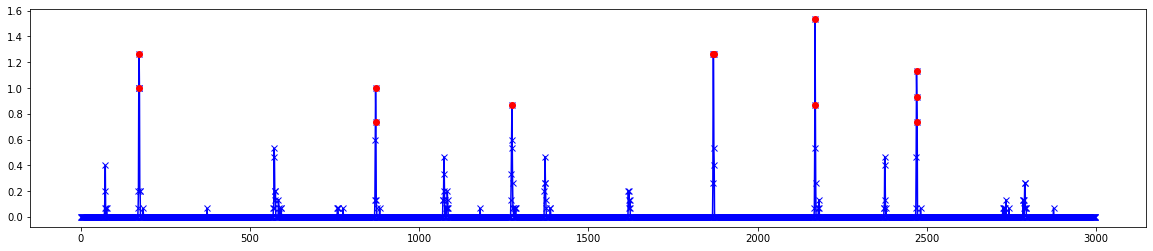

In [238]:
cell = 2
start = 1000
end = 4000
plt.figure(figsize=(20,4))
plt.plot(single_trial_bin[:,start:end,cell].mean(0), 'bx-')
small_fano_idxs = single_trial_bin[:,start:end,cell].var(0)/single_trial_bin[:,start:end,cell].mean(0)<0.4
plt.plot(np.where(small_fano_idxs)[0], single_trial_bin[:,start:end,cell].mean(0)[small_fano_idxs], 'ro')

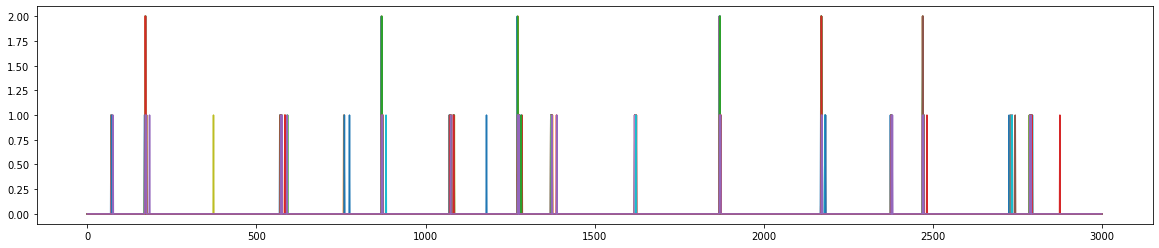

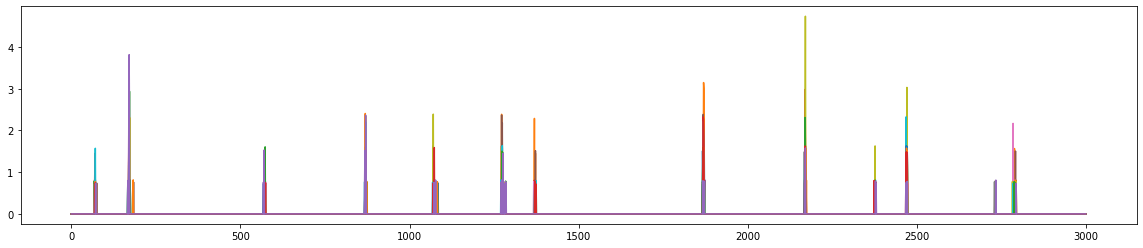

In [240]:
cell = 2
plt.figure(figsize=(20,4))
plt.plot(np.swapaxes(single_trial_bin[:,1000:4000,cell], 0, 1))
plt.show()
plt.figure(figsize=(20,4))
plt.plot(np.swapaxes(pred_single_trial3[:,1000:4000,cell], 0, 1))
plt.show()

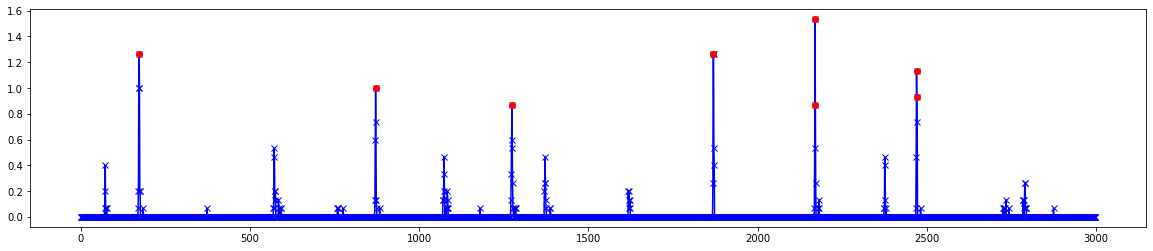

In [261]:
cell = 2
start = 1000
end = 4000
plt.figure(figsize=(20,4))
plt.plot(single_trial_bin[:,start:end,cell].mean(0), 'bx-')
small_fano_idxs = single_trial_bin[:,start:end,cell].var(0)/single_trial_bin[:,start:end,cell].mean(0)<0.25
plt.plot(np.where(small_fano_idxs)[0], single_trial_bin[:,start:end,cell].mean(0)[small_fano_idxs], 'ro')

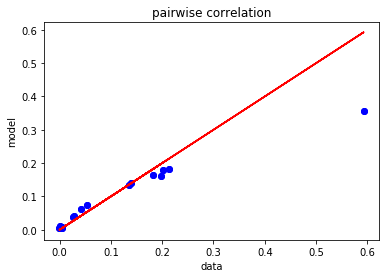

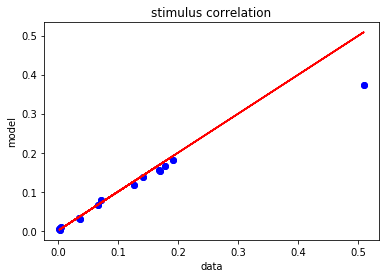

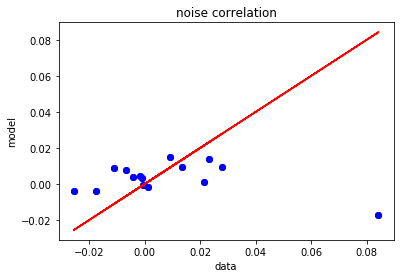

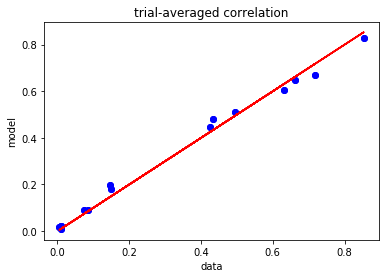

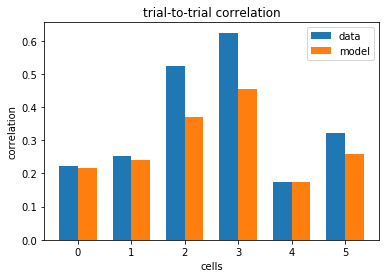

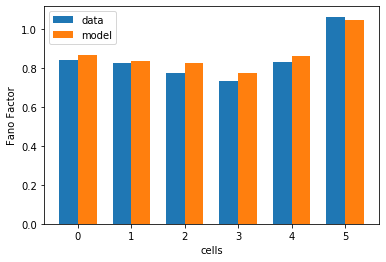

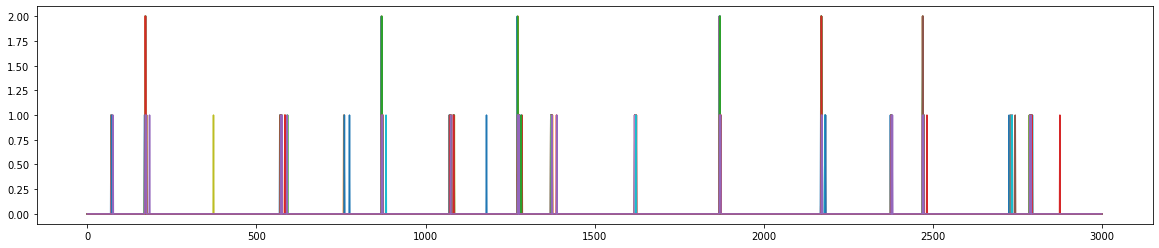

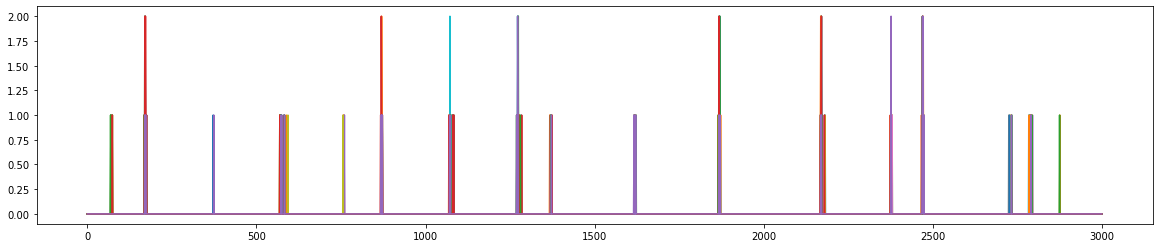

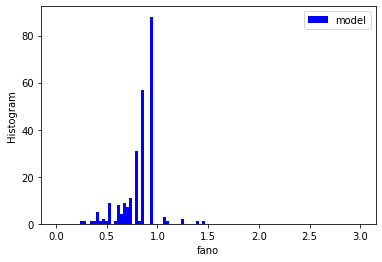

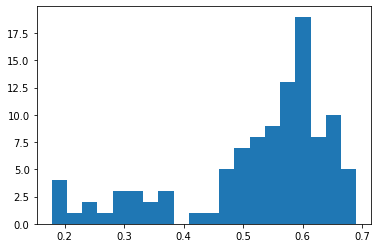

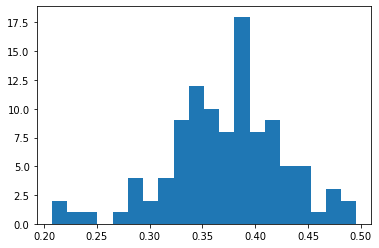

In [313]:
device = torch.device('cuda:0')
single_trial_pre = np.repeat(np.expand_dims(targ, axis=0), 15, axis=0)
single_trial_pre = torch.from_numpy(single_trial_pre).to(device)
#poisson_2s = [0.019, 0.019, 0.021, 0.022, 0.019, 0.0085]
poisson_2s = [0.02, 0.02, 0.023, 0.025, 0.02, 0.0085]
poisson_rates = (torch.rand(*single_trial_pre.shape).to(device) * 0.2) - 0.1
poisson_rates += 0.01/torch.tensor(poisson_2s).to(device)
poisson_rates = 0.01/poisson_rates
pred_single_trial = torch.poisson(single_trial_pre * poisson_rates) / poisson_rates
pred_single_trial = pred_single_trial.cpu().numpy()
pred_single_trial3 = pred_single_trial.copy()
#pred_single_trial3[:, pred<1.5] = 0.
pred_single_trial3 = pred_single_trial3/100.
pred_single_trial3 = np.floor(np.random.rand(*pred_single_trial3.shape) + pred_single_trial3)
pred_single_trial3[pred_single_trial3>2] = 2

correlation_plot(norm_single_trial_bin, pred_single_trial3, 15, 6)
cell = 2
plt.figure(figsize=(20,4))
plt.plot(np.swapaxes(single_trial_bin[:,1000:4000,cell], 0, 1))
plt.show()
plt.figure(figsize=(20,4))
plt.plot(np.swapaxes(pred_single_trial3[:,1000:4000,cell], 0, 1))
plt.show()
zero_idx = np.where(pred_single_trial3[:,:,cell].mean(0).flatten() == 0)[0]
plt.hist(np.delete(pred_single_trial3[:,:,cell].var(0).flatten(), zero_idx)/np.delete(pred_single_trial3[:,:,cell].mean(0).flatten(), zero_idx), range=(0,3), bins=100, color='b', label='model')
plt.xlabel('fano')
plt.ylabel('Histogram')
plt.legend()
plt.show()
corrs = []
for i in range(15):
    for j in range(i+1, 15):
        corrs.append(pearsonr(norm_single_trial_bin[i,:,cell], norm_single_trial_bin[j,:,cell])[0])
plt.hist(corrs, bins=20)
plt.show()
corrs = []
for i in range(15):
    for j in range(i+1, 15):
        corrs.append(pearsonr(pred_single_trial3[i,:,cell], pred_single_trial3[j,:,cell])[0])
plt.hist(corrs, bins=20)
plt.show()

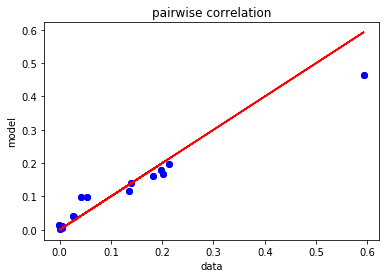

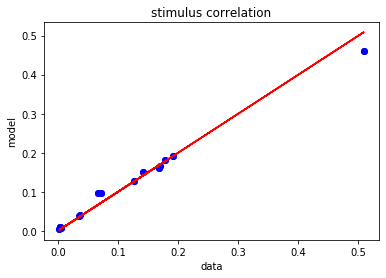

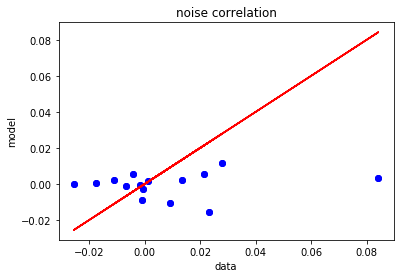

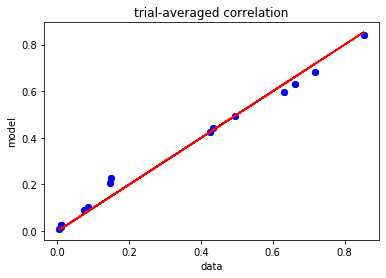

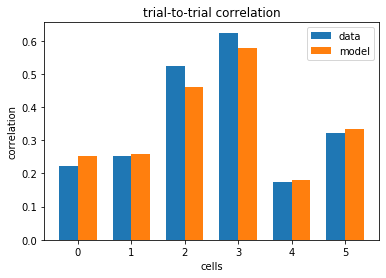

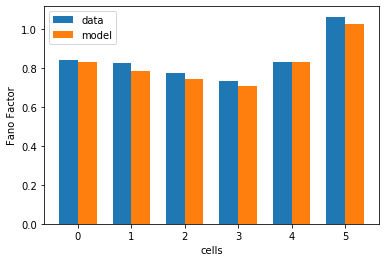

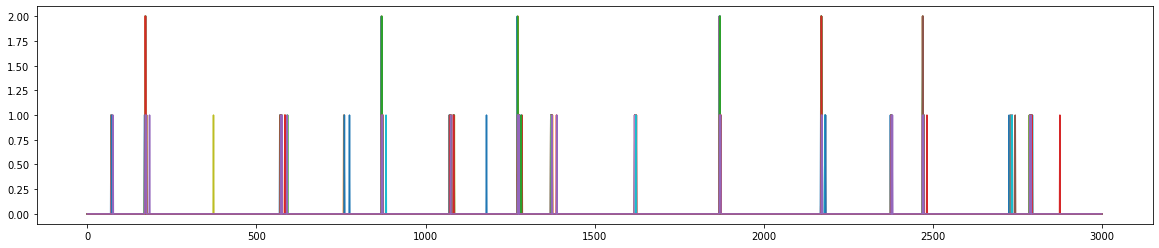

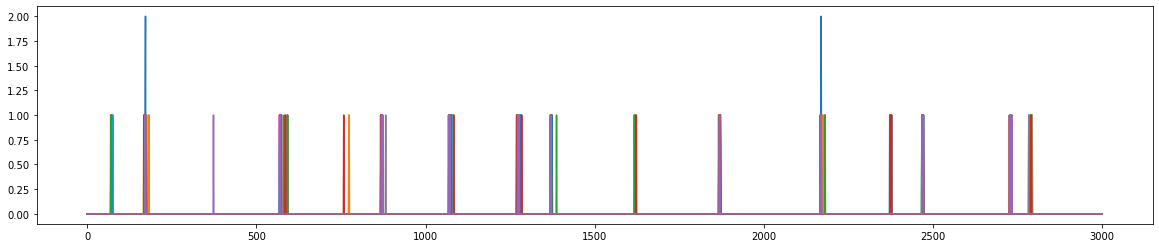

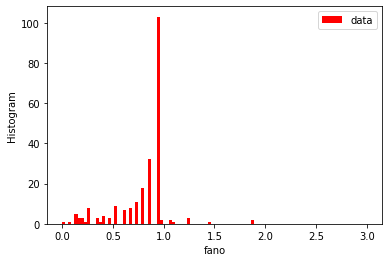

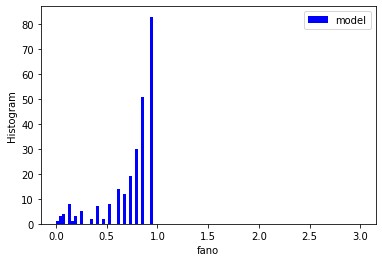

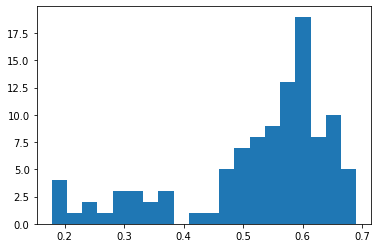

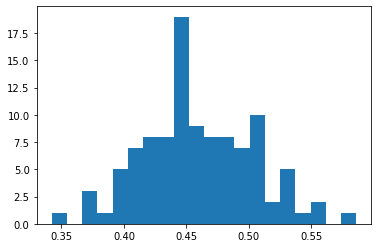

In [361]:
device = torch.device('cuda:0')
single_trial_pre = np.repeat(np.expand_dims(targ, axis=0), 15, axis=0)
single_trial_pre = torch.from_numpy(single_trial_pre).to(device)
#poisson_2s = [0.019, 0.019, 0.021, 0.022, 0.019, 0.0085]
poisson_2s = [0.02, 0.02, 0.023, 0.025, 0.02, 0.0085]
poisson_rates = (torch.rand(*single_trial_pre.shape).to(device) * 0.1) - 0.05
poisson_rates += 0.01/torch.tensor(poisson_2s).to(device)
poisson_rates = 0.01/poisson_rates
pred_single_trial = torch.poisson(single_trial_pre * poisson_rates) / poisson_rates
pred_single_trial = pred_single_trial.cpu().numpy()
pred_single_trial3 = pred_single_trial.copy()
#pred_single_trial3[:, pred<1.5] = 0.
pred_single_trial3 = pred_single_trial3/100.
pred_single_trial3 = np.floor(np.random.rand(*pred_single_trial3.shape) + pred_single_trial3)
maxspikes = np.array([1,1,1,1,1,2])
for trial in range(15):
    extra = pred_single_trial3[trial] - maxspikes
    pred_single_trial3[trial] = np.minimum(pred_single_trial3[trial], maxspikes)
    extra[extra<0] = 0
    pred_single_trial3[(trial+1)%15] += extra
for trial in range(15):
    extra = pred_single_trial3[trial] - maxspikes
    pred_single_trial3[trial] = np.minimum(pred_single_trial3[trial], maxspikes)
    extra[extra<0] = 0
    pred_single_trial3[(trial+1)%15] += extra
maxspikes = np.array([2,2,2,2,2,3])
for trial in range(15):
    extra = pred_single_trial3[trial] - maxspikes
    pred_single_trial3[trial] = np.minimum(pred_single_trial3[trial], maxspikes)
    extra[extra<0] = 0
    pred_single_trial3[(trial+1)%15] += extra

correlation_plot(norm_single_trial_bin, pred_single_trial3, 15, 6)
cell = 2
plt.figure(figsize=(20,4))
plt.plot(np.swapaxes(single_trial_bin[:,1000:4000,cell], 0, 1))
plt.show()
plt.figure(figsize=(20,4))
plt.plot(np.swapaxes(pred_single_trial3[:,1000:4000,cell], 0, 1))
plt.show()
zero_idx = np.where(single_trial_bin[:,:,cell].mean(0).flatten() == 0)[0]
plt.hist(np.delete(single_trial_bin[:,:,cell].var(0).flatten(), zero_idx)/np.delete(single_trial_bin[:,:,cell].mean(0).flatten(), zero_idx), range=(0,3), bins=100, color='r', label='data')
plt.xlabel('fano')
plt.ylabel('Histogram')
plt.legend()
plt.show()
zero_idx = np.where(pred_single_trial3[:,:,cell].mean(0).flatten() == 0)[0]
plt.hist(np.delete(pred_single_trial3[:,:,cell].var(0).flatten(), zero_idx)/np.delete(pred_single_trial3[:,:,cell].mean(0).flatten(), zero_idx), range=(0,3), bins=100, color='b', label='model')
plt.xlabel('fano')
plt.ylabel('Histogram')
plt.legend()
plt.show()
corrs = []
for i in range(15):
    for j in range(i+1, 15):
        corrs.append(pearsonr(norm_single_trial_bin[i,:,cell], norm_single_trial_bin[j,:,cell])[0])
plt.hist(corrs, bins=20)
plt.show()
corrs = []
for i in range(15):
    for j in range(i+1, 15):
        corrs.append(pearsonr(pred_single_trial3[i,:,cell], pred_single_trial3[j,:,cell])[0])
plt.hist(corrs, bins=20)
plt.show()

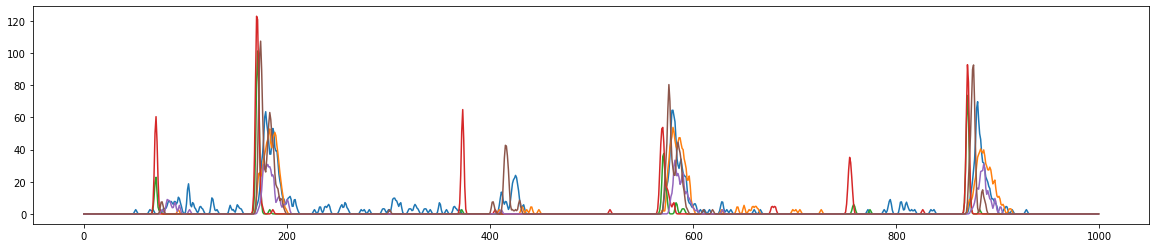

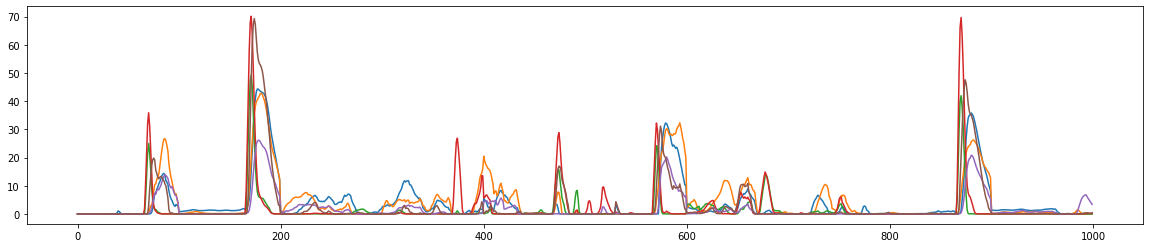

In [341]:
plt.figure(figsize=(20,4))
plt.plot(targ[1000:2000])
plt.show()
plt.figure(figsize=(20,4))
plt.plot(pred[1000:2000])
plt.show()

In [330]:
pred_single_trial3[trial][(pred_single_trial3[trial]>maxspikes)].shape

(47,)

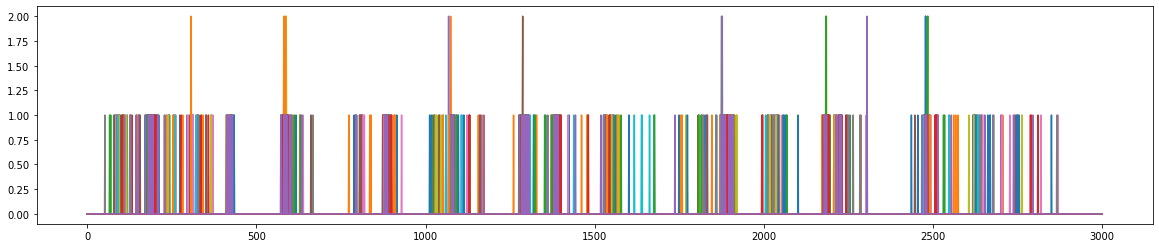

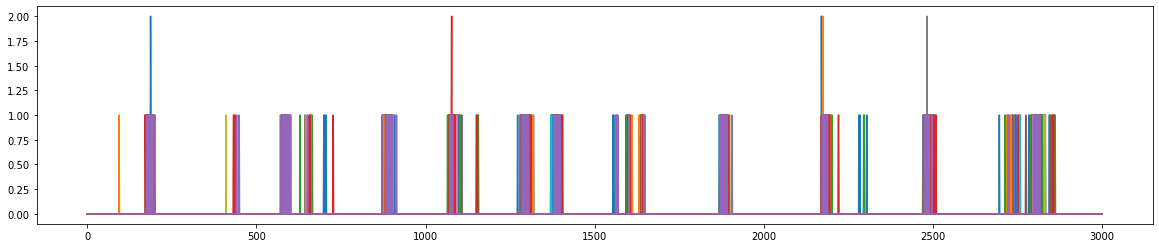

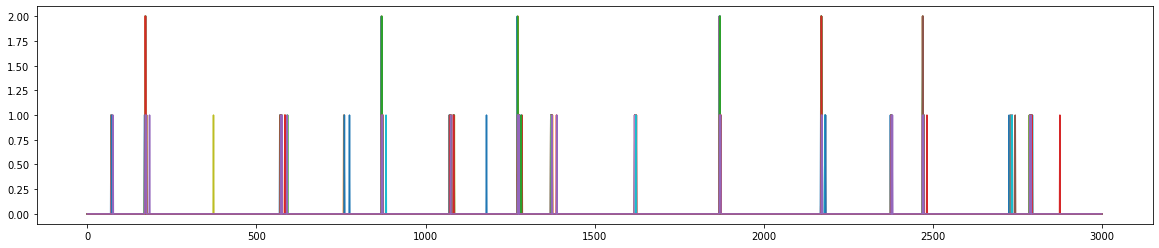

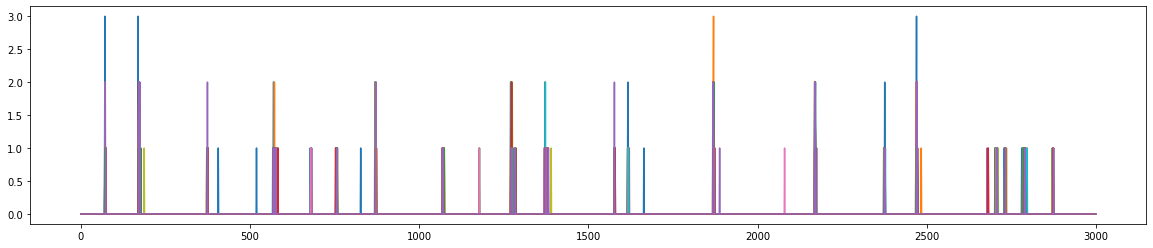

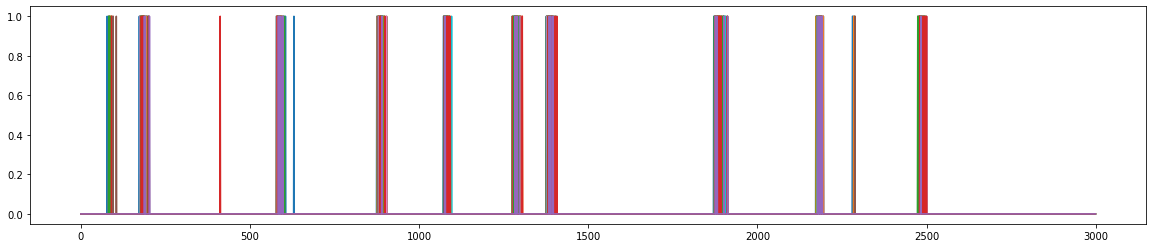

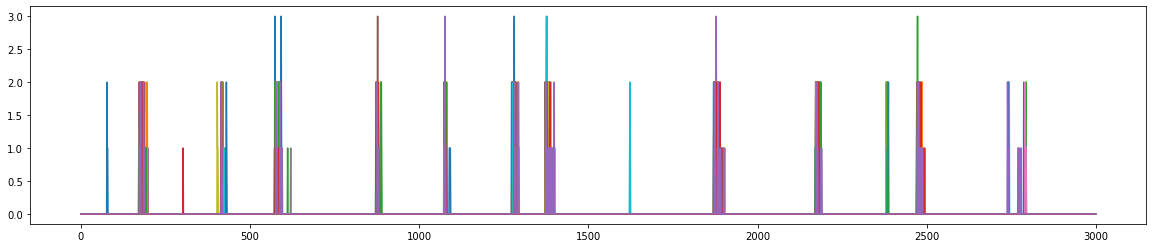

In [325]:
for cell in range(6):
    plt.figure(figsize=(20,4))
    plt.plot(np.swapaxes(single_trial_bin[:,1000:4000,cell], 0, 1))
    plt.show()

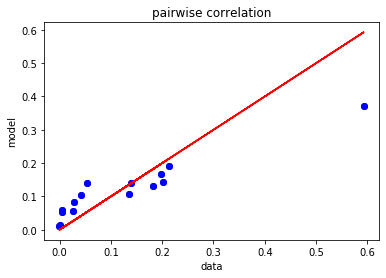

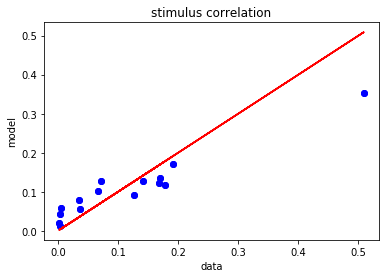

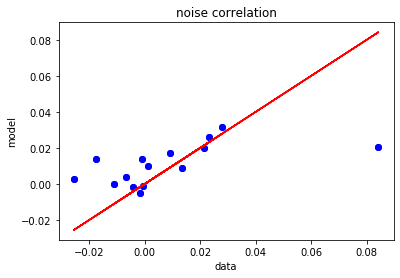

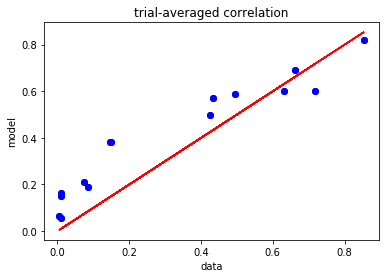

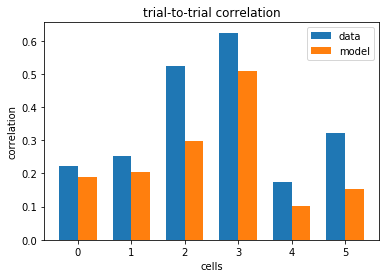

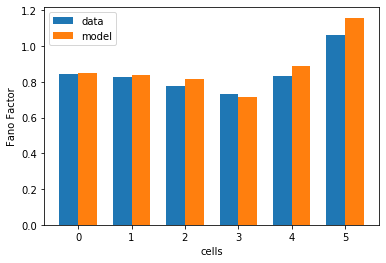

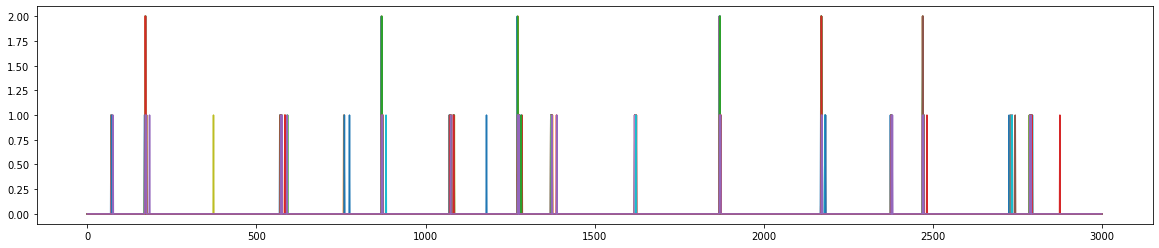

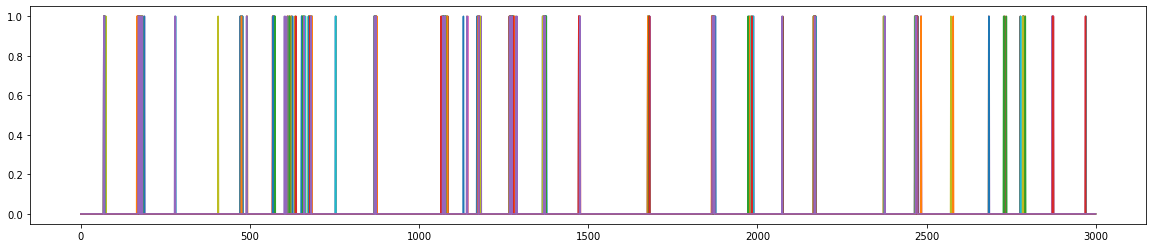

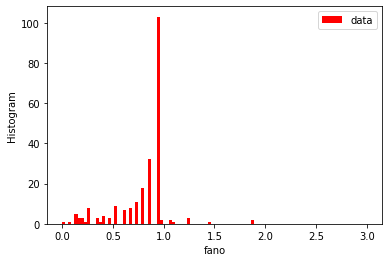

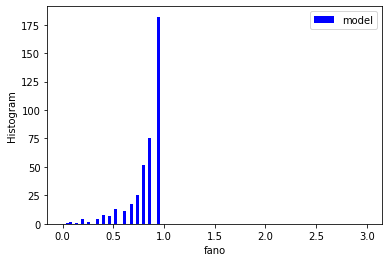

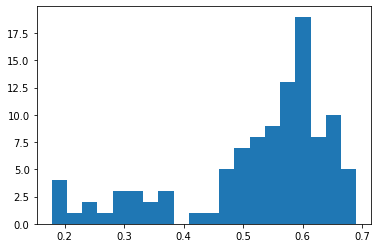

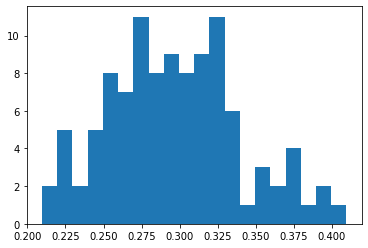

In [360]:
poisson_2s = [0.02, 0.02, 0.023, 0.025, 0.02, 0.0085]
pred_single_trial_pre = model_single_trial_pre(model, test_data, device, n_repeats=15, n_cells=6, poisson=[None, None, poisson_2s], gaussian=[0., 0., 0.5, 0]) * 1.71
pred_single_trial_pre[pred_single_trial_pre<3] = 0.
poisson_rates = (torch.rand(*pred_single_trial_pre.shape).to(device) * 0.1) - 0.05
poisson_rates += 0.01/torch.tensor(poisson_2s).to(device)
poisson_rates = 0.01/poisson_rates
pred_single_trial = torch.poisson(pred_single_trial_pre * poisson_rates) / poisson_rates
pred_single_trial = pred_single_trial.cpu().numpy()
pred_single_trial3 = pred_single_trial.copy()
pred_single_trial3[:, pred<1.5] = 0.
pred_single_trial3 = pred_single_trial3/100.
pred_single_trial3 = np.floor(np.random.rand(*pred_single_trial3.shape) + pred_single_trial3)
maxspikes = np.array([1,1,1,1,1,2])
for trial in range(15):
    extra = pred_single_trial3[trial] - maxspikes
    pred_single_trial3[trial] = np.minimum(pred_single_trial3[trial], maxspikes)
    extra[extra<0] = 0
    pred_single_trial3[(trial+1)%15] += extra
for trial in range(15):
    extra = pred_single_trial3[trial] - maxspikes
    pred_single_trial3[trial] = np.minimum(pred_single_trial3[trial], maxspikes)
    extra[extra<0] = 0
    pred_single_trial3[(trial+1)%15] += extra
maxspikes = np.array([2,2,2,2,2,3])
for trial in range(15):
    extra = pred_single_trial3[trial] - maxspikes
    pred_single_trial3[trial] = np.minimum(pred_single_trial3[trial], maxspikes)
    extra[extra<0] = 0
    pred_single_trial3[(trial+1)%15] += extra

correlation_plot(norm_single_trial_bin, pred_single_trial3, 15, 6)
cell = 2
plt.figure(figsize=(20,4))
plt.plot(np.swapaxes(single_trial_bin[:,1000:4000,cell], 0, 1))
plt.show()
plt.figure(figsize=(20,4))
plt.plot(np.swapaxes(pred_single_trial3[:,1000:4000,cell], 0, 1))
plt.show()
zero_idx = np.where(single_trial_bin[:,:,cell].mean(0).flatten() == 0)[0]
plt.hist(np.delete(single_trial_bin[:,:,cell].var(0).flatten(), zero_idx)/np.delete(single_trial_bin[:,:,cell].mean(0).flatten(), zero_idx), range=(0,3), bins=100, color='r', label='data')
plt.xlabel('fano')
plt.ylabel('Histogram')
plt.legend()
plt.show()
zero_idx = np.where(pred_single_trial3[:,:,cell].mean(0).flatten() == 0)[0]
plt.hist(np.delete(pred_single_trial3[:,:,cell].var(0).flatten(), zero_idx)/np.delete(pred_single_trial3[:,:,cell].mean(0).flatten(), zero_idx), range=(0,3), bins=100, color='b', label='model')
plt.xlabel('fano')
plt.ylabel('Histogram')
plt.legend()
plt.show()
corrs = []
for i in range(15):
    for j in range(i+1, 15):
        corrs.append(pearsonr(norm_single_trial_bin[i,:,cell], norm_single_trial_bin[j,:,cell])[0])
plt.hist(corrs, bins=20)
plt.show()
corrs = []
for i in range(15):
    for j in range(i+1, 15):
        corrs.append(pearsonr(pred_single_trial3[i,:,cell], pred_single_trial3[j,:,cell])[0])
plt.hist(corrs, bins=20)
plt.show()

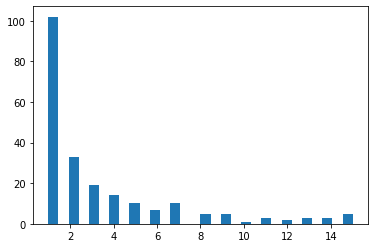

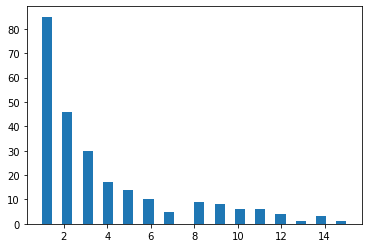

In [271]:
cell = 2 
plt.hist(single_trial_bin.sum(0)[:,cell], bins=30, range=(1, 15))
plt.show()
plt.hist(pred_single_trial3.sum(0)[:,cell], bins=30, range=(1, 15))
plt.show()

In [293]:
trial1 = 4
trial2 = 5
print((single_trial_bin[trial1,:,cell]*single_trial_bin[trial2,:,cell]).sum())
print((pred_single_trial3[trial1,:,cell]*pred_single_trial3[trial2,:,cell]).sum())
print(pearsonr(single_trial_bin[trial1,:,cell],single_trial_bin[trial2,:,cell])[0], pearsonr(pred_single_trial3[trial1,:,cell],pred_single_trial3[trial2,:,cell])[0])

51.0
39.0
0.6601289090445902 0.48371900621920844


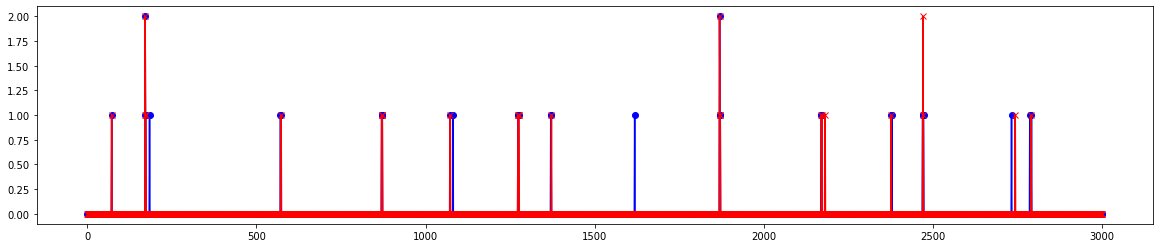

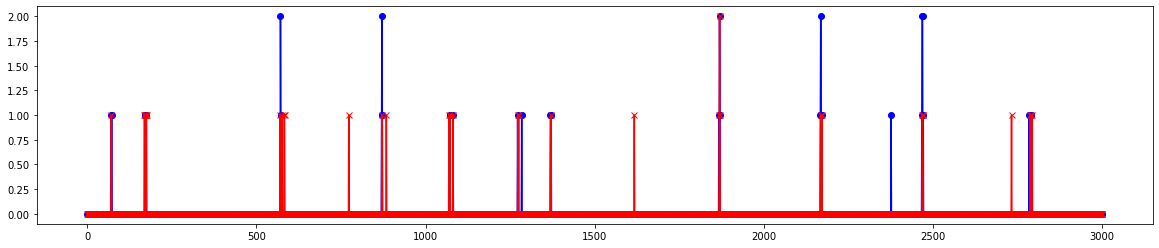

In [298]:
cell = 2
trial1 = 4
trial2 = 5
plt.figure(figsize=(20,4))
plt.plot(single_trial_bin[trial1,1000:4000,cell], 'bo-')
plt.plot(single_trial_bin[trial2,1000:4000,cell], 'rx-')
plt.show()
plt.figure(figsize=(20,4))
plt.plot(pred_single_trial3[trial1,1000:4000,cell], 'bo-')
plt.plot(pred_single_trial3[trial2,1000:4000,cell], 'rx-')
plt.show()

In [126]:
norm_single_trial_bin.std(1).mean(), pred_single_trial3.std(1).mean()

(0.15893127299978319, 0.12900496)

In [127]:
norm_single_trial_bin.mean(), pred_single_trial3.mean()

(0.022658244358730692, 0.017255176)

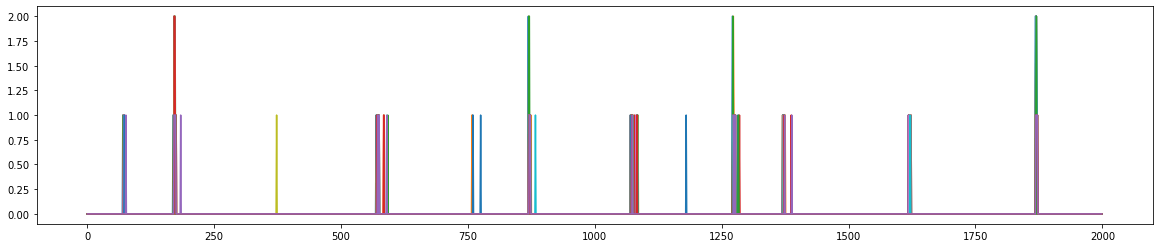

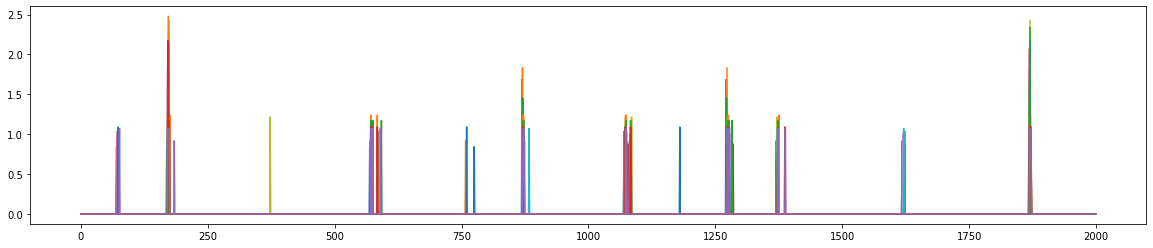

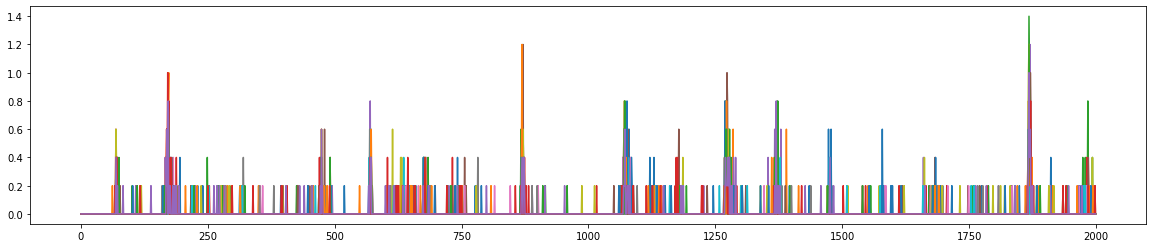

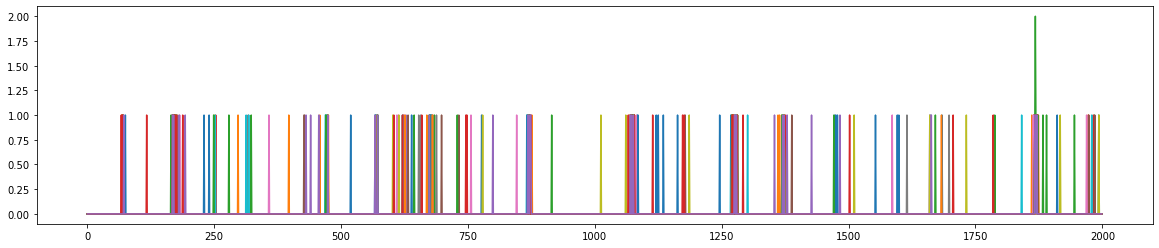

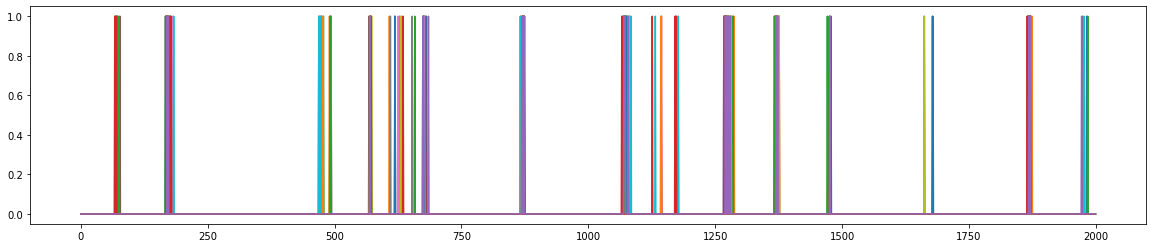

In [104]:
cell = 2
plt.figure(figsize=(20,4))
plt.plot(np.swapaxes(single_trial_bin[:,1000:3000,cell], 0, 1))
plt.show()
plt.figure(figsize=(20,4))
plt.plot(np.swapaxes(norm_single_trial_bin[:,1000:3000,cell], 0, 1))
plt.show()
plt.figure(figsize=(20,4))
plt.plot(np.swapaxes(pred_single_trial[:,1000:3000,cell]/100., 0, 1))
plt.show()
plt.figure(figsize=(20,4))
pred_single_trial2 = np.floor(np.random.rand(*pred_single_trial.shape) + pred_single_trial/100.)
plt.plot(np.swapaxes((pred_single_trial2[:,1000:3000,cell]), 0, 1))
plt.show()
plt.figure(figsize=(20,4))
pred_single_trial3 = pred_single_trial.copy()
pred_single_trial3[:, pred<1.5] = 0.
pred_single_trial3 = np.floor(np.random.rand(*pred_single_trial3.shape) + pred_single_trial3/100.)
plt.plot(np.swapaxes((pred_single_trial3[:,1000:3000,cell]), 0, 1))
plt.show()

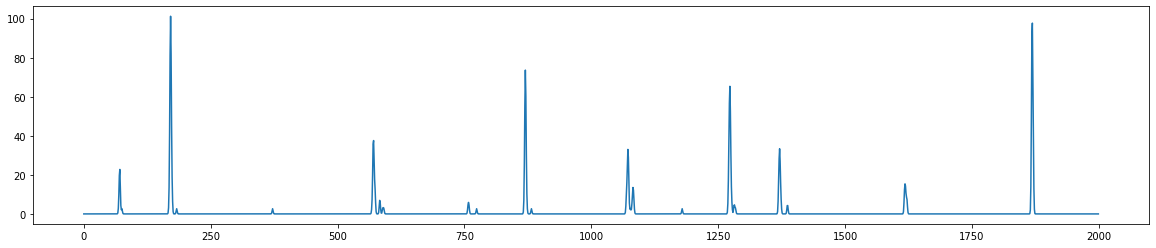

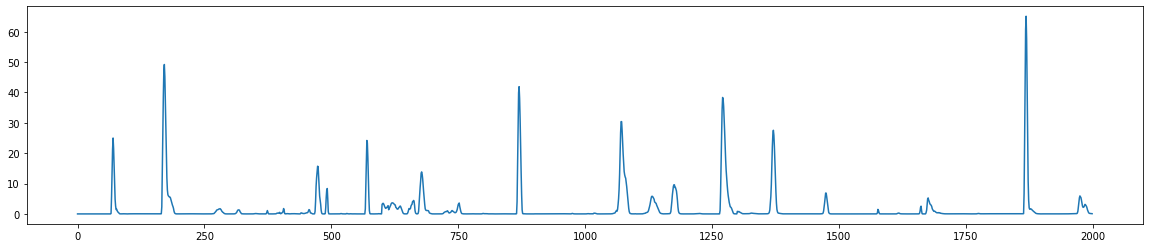

In [105]:
cell = 2
plt.figure(figsize=(20,4))
plt.plot(targ[1000:3000,cell])
plt.show()
plt.figure(figsize=(20,4))
plt.plot(pred[1000:3000,cell])
plt.show()

In [85]:
(pred<1.5).mean()

0.76530269998323

In [81]:
(targ <0.00001).mean()

0.7618648331376824

In [55]:
pred_single_trial.shape

(15, 5963, 6)

0.0 0.47180051958317326 0.83338418140597 3.8296515e-15 0.4530509568688264 -8.44232091642046e-18 0.9999999112183383
0.0 0.47124023482198046 0.8349509733710399 0.008017474 0.45277764303900214 0.00024474795937655885 0.9723548503058628
0.0 0.4705194358215505 0.8362823250047408 0.015385891 0.45183349180852467 0.0009698168681330301 0.9471738708537174
0.0 0.4679236626260677 0.837200858206066 0.023356888 0.4496694108834765 0.002074356880356959 0.924178496193309
0.0 0.46392425465503495 0.8381099107986502 0.031113742 0.44657796011719764 0.0034008386147410504 0.9033703166383774
0.0 0.4588509235752036 0.8392877154532316 0.038733207 0.4429372430788179 0.005189915913705251 0.882638572345152
0.0 0.4519315353655921 0.8392850654821583 0.047127664 0.43732346007451567 0.007023046697810281 0.8698422617120639
0.0 0.44681666146685034 0.8383421210872372 0.055873327 0.432366476757899 0.0095645360858821 0.8519858833049746
0.0 0.44387372264459285 0.8386879920975812 0.06476809 0.42911445475825855 0.0119496281117

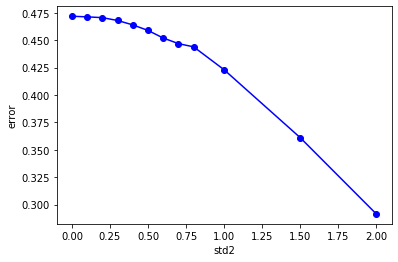

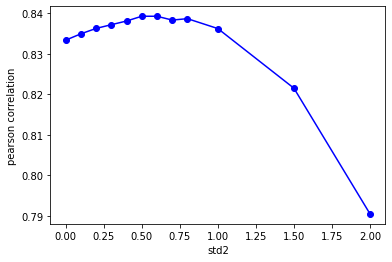

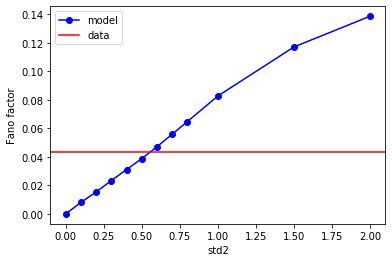

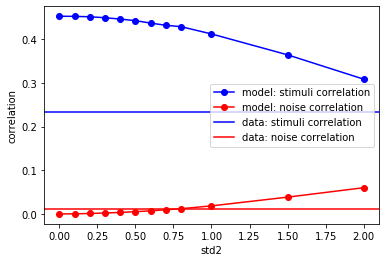

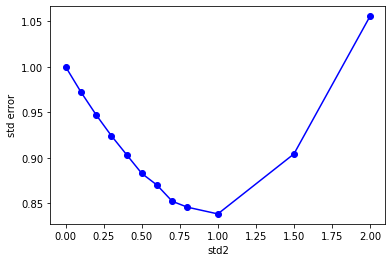

In [28]:
single_corr = single_trial_corr_matrix(6, 15, single_trial)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()
std0_list = [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0, 1.5, 2.0]
error_list = []
accuracy_list = []
fano_list = []
mean_stim_corr_list = []
mean_noise_corr_list = []
std_error_list = []
for std0 in std0_list:
    error, accuracy, fano, mean_stim_corr, mean_noise_corr, std_error = Noises(model, test_data, single_corr, single_trial, device, n_repeats=15, n_cells=6, gaussian=[std0, 0, 0, 0], thre=14.)
    print(std2, error, accuracy, fano, mean_stim_corr, mean_noise_corr, std_error)
    error_list.append(error)
    accuracy_list.append(accuracy)
    fano_list.append(fano)
    mean_stim_corr_list.append(mean_stim_corr)
    mean_noise_corr_list.append(mean_noise_corr)
    std_error_list.append(std_error)
single_noise_plot('std2', std2_list, error_list, accuracy_list, fano_list, mean_stim_corr_list, mean_noise_corr_list, std_error_list, 
                  recorded_fano=0.0436, recorded_mean_stim_corr=0.2332, recorded_mean_noise_corr=0.01236)

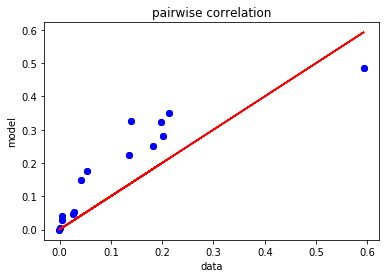

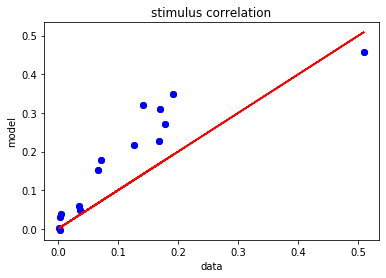

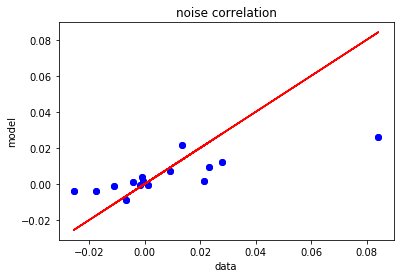

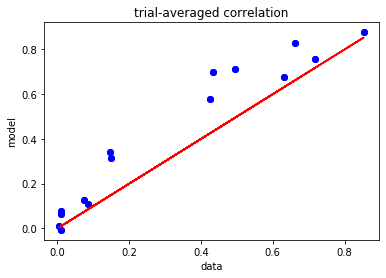

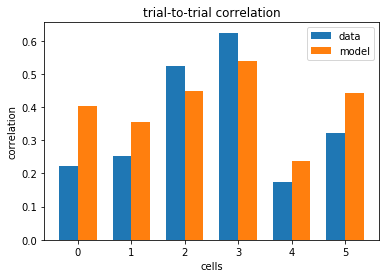

0.36079812


In [141]:
pred_single_trial = model_single_trial(model, test_data, device, n_repeats=15, n_cells=6, poisson=[None, None, 0.03], gaussian=[0.5, 0., 0.23, 0], thre=14)
correlation_plot(norm_single_trial_bin, pred_single_trial, 15, 6)
print(Fano(pred_single_trial))

In [116]:
print(stim_corr2(norm_single_trial_bin))

[[0.27511989 0.18632018 0.00345791 0.00403738 0.17994998 0.13774171]
 [0.18632018 0.28897783 0.03355329 0.03235695 0.16213796 0.1612296 ]
 [0.00345791 0.03355329 0.55593563 0.51266923 0.00317784 0.06681036]
 [0.00403738 0.03235695 0.51266923 0.64954671 0.00196302 0.0711326 ]
 [0.17994998 0.16213796 0.00317784 0.00196302 0.22907124 0.12338735]
 [0.13774171 0.1612296  0.06681036 0.0711326  0.12338735 0.36595406]]


In [117]:
with h5py.File('/home/xhding/tem_stim/21-03-15/naturalscene.h5', 'r') as f:
    target = np.array(f['test']['response']['firing_rate_10ms'])

In [122]:
for i in range(7):
    for j in range(i+1,7):
        print(i, j, pearsonr(target[i], target[j])[0])

0 1 0.7855705959175815
0 2 0.03272547723804309
0 3 0.03139388462455682
0 4 0.8647481540024394
0 5 0.24615553622818748
0 6 0.5567875682230344
1 2 0.13653537743598917
1 3 0.12601044845604245
1 4 0.7740204422262946
1 5 0.250066211357025
1 6 0.6215795778138586
2 3 0.9139426224031528
2 4 0.02981492676623041
2 5 0.106590701994261
2 6 0.2628108015318872
3 4 0.02753437445552515
3 5 0.08791845366466854
3 6 0.25208862575866897
4 5 0.24995458522272124
4 6 0.5592225299428303
5 6 0.36871213218753135


In [137]:
stimuli_corr_matrix(6,15,norm_single_trial_bin).flatten()[diagonal_idxs]

array([0.22158488, 0.25290171, 0.52404234, 0.62414626, 0.17499704,
       0.32200351])

In [133]:
np.nanmean(np.var(norm_single_trial_bin[:15], axis=0)/(np.mean(norm_single_trial_bin[:15], axis=0)), axis=0)

array([0.84100512, 0.82652948, 0.77656342, 0.73135694, 0.83007645,
       1.06411994])

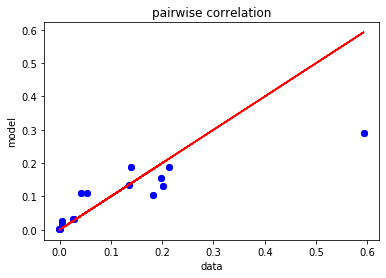

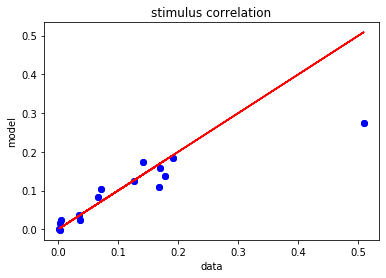

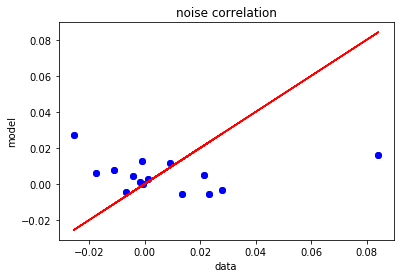

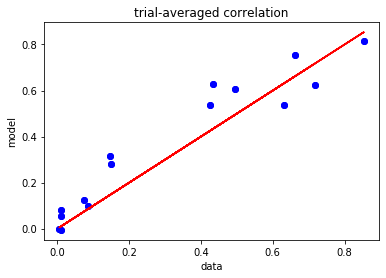

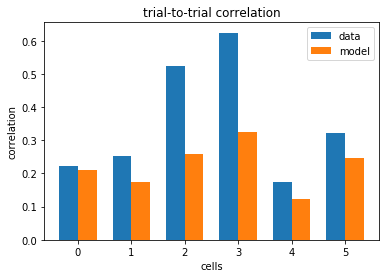

0.84715223


In [140]:
pred_single_trial = model_single_trial(model, test_data, device, n_repeats=15, n_cells=6, poisson=[None, None, 0.0116], gaussian=[0.5, 0., 0.23, 0], thre=14)
correlation_plot(norm_single_trial_bin, pred_single_trial, 15, 6)
print(Fano(pred_single_trial))